In [1]:
import pandas as pd
import glob
import os
# from tqdm.auto import tqdm
from tqdm import tqdm

# import tqdm.notebook as tq
import matplotlib.pyplot as plt
import random


from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
# print(mat_fonts)

import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['DengXian']
plt.rcParams.update({'font.size': 16})
pd.set_option('display.max_columns', None)  # show all columns
pd.options.mode.chained_assignment = None  # default='warn'  # don't understand yet


# Load ACS population data

The income level were computed by Metropolitian Statistics Areas (MSAs); thus, please do analysis based on MSA only, NOT county- or state-level.

In [1177]:
# pwd

'H:\\Safegraph\\weekly_county_files\\weekly_patterns_time_aggre_2018_2021_test'

In [6]:
# Load NAICS code
NAICS_df = pd.read_csv(r'J:\Safegraph\US_POI_20220103\US_POI_20220103_NAICS.csv').drop(columns='POI_count')
NAICS_df['naics_code_sub'] = NAICS_df['naics_code'].astype(str)
NAICS_df['naics_code_top'] = NAICS_df['naics_code_sub'].str[:4]

NAICS_df

,top_category,sub_category,naics_code,naics_code_sub,naics_code_top
0,"Greenhouse, Nursery, and Floriculture Production",Nursery and Tree Production,111421,111421,1114
1,Support Activities for Crop Production,"Soil Preparation, Planting, and Cultivating",115112,115112,1151
2,Oil and Gas Extraction,Crude Petroleum Extraction,211120,211120,2111
3,Support Activities for Mining,Support Activities for Oil and Gas Operations,213112,213112,2131
4,"Electric Power Generation, Transmission and Di...",Hydroelectric Power Generation,221111,221111,2211
...,...,...,...,...,...
394,Administration of Human Resource Programs,Administration of Human Resource Programs (exc...,923130,923130,9231
395,Administration of Human Resource Programs,Administration of Veterans' Affairs,923140,923140,9231
396,Administration of Economic Programs,Regulation and Administration of Transportatio...,926120,926120,9261
397,National Security and International Affairs,National Security,928110,928110,9281


In [177]:
NAICS_df['top_category'].value_counts()

Automotive Repair and Maintenance                                         8
Specialty Food Stores                                                     6
Other Schools and Instruction                                             6
Justice, Public Order, and Safety Activities                              6
Clothing Stores                                                           6
                                                                         ..
General Merchandise Stores, including Warehouse Clubs and Supercenters    1
Department Stores                                                         1
Book Stores and News Dealers                                              1
Shoe Stores                                                               1
Support Activities for Road Transportation                                1
Name: top_category, Length: 197, dtype: int64

In [134]:
# Set the data directory first:
Data_dir = r'..\weekly_patterns_time_aggre_2018_2021_test'  # all raw data
Fast_food_dir = r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_fast_food_50brands'  # fast food POIs


MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})
MSA_decile_df['cbg_fips'] = MSA_decile_df['cbg_fips'].astype(str).str.zfill(12)
MSA_decile_df['county_fips'] = MSA_decile_df['cbg_fips'].astype(str).str[:5]
MSA_decile_df['tract_fips'] = MSA_decile_df['cbg_fips'].astype(str).str[:11]

# MSA_decile_df = MSA_decile_df[MSA_decile_df['median_household_income_decile'] != '']
print("Total population:", MSA_decile_df['cbg_total_population'].sum())


<ipython-input-134-e1375e06c37f>:6: DtypeWarning: Columns (19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})


Total population: 328016242


In [9]:
MSA_decile_df.head(5)

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,INTPTLAT,INTPTLON,Shape_Area,GEOID_Data,county_code,COUNTY_NAME,STATE_ABB,STATE_NAME,cbg_total_population,p_asian,p_black,p_white,CBSA Code,CSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,CSA Title,County/County Equivalent,State Name,FIPS State Code,FIPS County Code,GEOID,total_household_income,total_households,mean_household_income,median_household_income,cbg_fips,median_household_income_decile,county_fips,tract_fips
0,28.0,1,105,687100,1,32.538810,-87.365211,3.630738e+08,15000US011056871001,1105,Perry,AL,Alabama,462,0.000000,0.476190,0.523810,,,,,,,,1,105,15000US011056871001,6279926.0,172.0,36511.197674,0,011056871001,0.0,01105,01105687100
1,29.0,1,105,687000,2,32.613224,-87.269014,5.349134e+07,15000US011056870002,1105,Perry,AL,Alabama,931,0.000000,0.358754,0.631579,,,,,,,,1,105,15000US011056870002,13069842.0,399.0,32756.496241,23494,011056870002,0.0,01105,01105687000
2,148.0,1,133,965501,2,34.241708,-87.141064,7.349666e+07,15000US011339655012,1133,Winston,AL,Alabama,1031,0.000000,0.000000,0.992241,,,,,,,,1,133,15000US011339655012,21077303.0,445.0,47364.725843,43080,011339655012,2.0,01133,01133965501
3,151.0,1,133,965503,2,34.063547,-87.167204,5.437721e+07,15000US011339655032,1133,Winston,AL,Alabama,920,0.007609,0.000000,0.946739,,,,,,,,1,133,15000US011339655032,25729831.5,383.0,67179.71671,52431,011339655032,7.0,01133,01133965503
4,152.0,1,133,965502,2,34.026184,-87.208888,6.900445e+07,15000US011339655022,1133,Winston,AL,Alabama,1409,0.000000,0.000000,0.996451,,,,,,,,1,133,15000US011339655022,48117211.0,665.0,72356.708271,54792,011339655022,8.0,01133,01133965502


In [10]:
MSA_decile_df.groupby('tract_fips')['cbg_total_population'].sum().sum()

328016242

In [11]:
MSA_decile_df.columns

Index(['OBJECTID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'INTPTLAT',
       'INTPTLON', 'Shape_Area', 'GEOID_Data', 'county_code', 'COUNTY_NAME',
       'STATE_ABB', 'STATE_NAME', 'cbg_total_population', 'p_asian', 'p_black',
       'p_white', 'CBSA Code', 'CSA Code', 'CBSA Title',
       'Metropolitan/Micropolitan Statistical Area', 'CSA Title',
       'County/County Equivalent', 'State Name', 'FIPS State Code',
       'FIPS County Code', 'GEOID', 'total_household_income',
       'total_households', 'mean_household_income', 'median_household_income',
       'cbg_fips', 'median_household_income_decile', 'county_fips',
       'tract_fips'],
      dtype='object')

In [128]:
MSA_decile_df.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,INTPTLAT,INTPTLON,Shape_Area,GEOID_Data,county_code,COUNTY_NAME,STATE_ABB,STATE_NAME,cbg_total_population,p_asian,p_black,p_white,CBSA Code,CSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,CSA Title,County/County Equivalent,State Name,FIPS State Code,FIPS County Code,GEOID,total_household_income,total_households,mean_household_income,median_household_income,cbg_fips,median_household_income_decile,county_fips,tract_fips
0,28.0,1,105,687100,1,32.538810,-87.365211,3.630738e+08,15000US011056871001,01105,Perry,AL,Alabama,462,0.000000,0.476190,0.523810,,,,,,,,1,105,15000US011056871001,6279926.0,172.0,36511.197674,0,011056871001,0.0,01105,01105687100
1,29.0,1,105,687000,2,32.613224,-87.269014,5.349134e+07,15000US011056870002,01105,Perry,AL,Alabama,931,0.000000,0.358754,0.631579,,,,,,,,1,105,15000US011056870002,13069842.0,399.0,32756.496241,23494,011056870002,0.0,01105,01105687000
2,148.0,1,133,965501,2,34.241708,-87.141064,7.349666e+07,15000US011339655012,01133,Winston,AL,Alabama,1031,0.000000,0.000000,0.992241,,,,,,,,1,133,15000US011339655012,21077303.0,445.0,47364.725843,43080,011339655012,2.0,01133,01133965501
3,151.0,1,133,965503,2,34.063547,-87.167204,5.437721e+07,15000US011339655032,01133,Winston,AL,Alabama,920,0.007609,0.000000,0.946739,,,,,,,,1,133,15000US011339655032,25729831.5,383.0,67179.71671,52431,011339655032,7.0,01133,01133965503
4,152.0,1,133,965502,2,34.026184,-87.208888,6.900445e+07,15000US011339655022,01133,Winston,AL,Alabama,1409,0.000000,0.000000,0.996451,,,,,,,,1,133,15000US011339655022,48117211.0,665.0,72356.708271,54792,011339655022,8.0,01133,01133965502


## Aggregate blockgroups to tract

In [129]:
MSA_decile_df['county_code'] = MSA_decile_df['county_code'].astype(str).str.zfill(5) 
MSA_decile_df['FIPS State Code'] = MSA_decile_df['county_code'].str[:2] 

# MSA_decile_df[MSA_decile_df['CBSA Title'].isin(MSA_names)]['cbg_fips']

# MSA_decile_df = MSA_decile_df[MSA_decile_df['median_household_income_decile'] != '']

MSA_counties = MSA_decile_df[MSA_decile_df['FIPS State Code'] == '45']['county_fips'].unique() 
MSA_counties = sorted(MSA_counties)
print("Total county count:")
len(MSA_counties) , MSA_counties[:2]

Total county count:


(46, ['45001', '45003'])

In [130]:
# assign the POI category level in NAICS (top/sub):
POI_level = 'sub'

metric = 'time_per_capita' # select on from: ['time_per_capita', 'visits_per_capita', 'visit_cnt', 'visitor_cnt']
# time span
start_time = '2018-01'
end_time = '2021-12' #  contain

In [280]:
def aggregate_time(visits_df, popu_df, aggre_column, NAICS_level_column='naics_code_sub', popu_column='cbg_total_population'):  # visits_df and  popu_df should have the common column: aggre_column
    
        
    # print("NAICS_level_column:", NAICS_level_column)

    # print("visits_df.columns:", visits_df.columns)
    
    if NAICS_level_column in visits_df.columns:
        if len(visits_df.iloc[0][NAICS_level_column]) == 4:
            cate_type = 'top'

        if len(visits_df.iloc[0][NAICS_level_column]) == 6:
            cate_type = 'sub'

    # print("NAICS_level_column:", NAICS_level_column)

    if NAICS_level_column == 'naics_code_customized':
        cate_type = 'sub'
            
            
    try:
        aggre_popu_column = aggre_column + '_popu'
        aggre_popu_df = popu_df.groupby([aggre_column]).agg(aggre_population=(popu_column, sum))
        # county_df['']
        merged_df = visits_df.merge(popu_df, left_on='visitor_home_cbgs', right_on='cbg_fips')

        # normalized_{cate_type} = f'normalized_{cate_type}'
        # print(cate_type, ' ', fr'normalized_{cate_type}_time', merged_df.columns)
        try:

            aggre_df = merged_df.groupby([aggre_column, NAICS_level_column], as_index=False).agg(normalized_dwell_time=(fr'normalized_{cate_type}_category_time', sum),   
                                                                        normalized_visit_cnt=('normalized_visit_cnt', sum),
                                                                        normalized_visitor_cnt=('normalized_visitor_cnt', sum),       
                                                                        # tract_population=('cbg_total_population', sum)
                                                                       )
            
            # print("len(aggre_df):", len(aggre_df))
        except Exception as e:
            print("Error in aggregate_time(): merged_df", e)
        
        # generate the targe format
        aggre_df = aggre_df.merge(aggre_popu_df, right_on=aggre_column, left_on=aggre_column)
        aggre_df['cate_level'] = cate_type[:3]
    except Exception as e:
        print("Error in aggregate_time():", e)
    return aggre_df



# make a test
cate_type = 'sub'
# visits_df = pd.read_csv(fr'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_test\01\01001\01001_{cate_type}_category_dwell_time_2018-01-01_To_2018-01-08.csv', dtype={'visitor_home_cbgs':str})
# county_df = county_df.merge(MSA_decile_df, left_on='visitor_home_cbgs', right_on='cbg_fips')

# fast food tesxt
visits_df = pd.read_csv(r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_fast_food_50brands_added_column\45\45017\45017_sub_category_dwell_time_2019-01-28_To_2019-02-04.csv', dtype={'visitor_home_cbgs':str})

columns = [c.replace(r'catetory', 'category') for c in visits_df.columns] # correct a typo
visits_df.columns = columns

aggre_column = 'tract_fips'
# NAICS_level_column = r'naics_code_sub'
NAICS_level_column = r'naics_code_customized'

visits_df = visits_df.merge(NAICS_df, left_on='sub_category', right_on=r'sub_category')

aggre_df = aggregate_time(visits_df=visits_df, popu_df=MSA_decile_df, aggre_column=aggre_column, NAICS_level_column=NAICS_level_column)
aggre_df

result_df = reformat_aggre(aggre_df, NAICS_df)
result_df



,fips,poi_category,variable,value
0,45017950100,fast_food,time_per_capita,5.822401
0,45017950100,fast_food,visits_per_capita,0.540630
0,45017950100,fast_food,visitor_per_capita,0.462875
1,45017950200,fast_food,time_per_capita,7.132018
1,45017950200,fast_food,visits_per_capita,0.614776
1,45017950200,fast_food,visitor_per_capita,0.522602
2,45017950400,fast_food,time_per_capita,11.768508
2,45017950400,fast_food,visits_per_capita,1.016386
2,45017950400,fast_food,visitor_per_capita,0.860878


In [242]:
# obtain CSV files
def obtain_CSVs(Data_dir,counties, start_time, end_time):
    target_CSVs = []
    # print("Obtaining CSV files..")
    # for county_fips in tqdm(counties[:], position=0, leave=True):
    for county_fips in counties[:]:
        try:
            state_fips = county_fips[:2]
            county_dir = os.path.join(Data_dir, str(county_fips))
            county_POI_time_csvs = glob.glob(os.path.join(Data_dir, state_fips, county_fips, f'{county_fips}_{POI_level}_category_dwell_time_*To*.csv'))


            for f in county_POI_time_csvs:
                basename = os.path.basename(f)
                county_fips = basename[:5]
                if not county_fips  in counties:
                    continue
                short_f = f.split('dwell_time_')[1]
                f_time = short_f[:7]
                # print(basename)

                if  start_time <= f_time and f_time <= end_time:
                    target_CSVs.append(f)
        except Exception as e:
             print("Error in getting target_CSVs:", e)
                
    return target_CSVs


# select the correct CSVs
# target_CSVs = target_CSVs[2:]  # no need to use this


target_CSVs = obtain_CSVs(Data_dir, counties=MSA_counties[:2], start_time=start_time, end_time=end_time)

print("Date:", start_time, '-',end_time)  

print(f'Found {len(target_CSVs)} files. Start to read them...')
 
print(f"county_POI_time_df row counts: {len(target_CSVs)}")
print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])

Date: 2018-01 - 2021-12
Found 418 files. Start to read them...
county_POI_time_df row counts: 418
The first and the last file: 
 ..\weekly_patterns_time_aggre_2018_2021_test\45\45001\45001_sub_category_dwell_time_2018-01-01_To_2018-01-08.csv 
 ..\weekly_patterns_time_aggre_2018_2021_test\45\45003\45003_sub_category_dwell_time_2021-12-27_To_2022-01-03.csv


In [42]:
# target_CSVs = obtain_CSVs(Data_dir, counties=county, start_time=start_time, end_time=end_time)  

In [216]:
def reformat_aggre(aggre_df, NAICS_df):
    
    try:
        if "naics_code_customized" not in aggre_df.columns:  
            aggre_df = aggre_df.merge(NAICS_df, left_on=NAICS_level_column, right_on=NAICS_level_column).sort_values([aggre_column, NAICS_level_column])
        else:
            aggre_df['naics_code_sub'] = aggre_df['naics_code_customized']
    # except Exception as e:
    #     print("Error in reformat_aggre():", e)
        
        aggre_df['time_per_capita'] = aggre_df['normalized_dwell_time'] / aggre_df['aggre_population']
        aggre_df['visits_per_capita'] = aggre_df['normalized_visit_cnt'] / aggre_df['aggre_population']
        aggre_df['visitor_per_capita'] = aggre_df['normalized_visitor_cnt'] / aggre_df['aggre_population']

        aggre_df['fips'] = aggre_df['tract_fips']
        
        time_per_capita_df = aggre_df[['fips']]
        time_per_capita_df['poi_category'] = aggre_df['naics_code_sub']
        time_per_capita_df['variable'] = 'time_per_capita'
        time_per_capita_df['value'] = aggre_df['time_per_capita']#.round(2)  # have issue.
        
        visits_per_capita_df = aggre_df[['fips']]
        visits_per_capita_df['poi_category'] = aggre_df['naics_code_sub']
        visits_per_capita_df['variable'] = 'visits_per_capita'
        visits_per_capita_df['value'] = aggre_df['visits_per_capita']#.round(6)


        visitor_per_capita_df = aggre_df[['fips']]
        visitor_per_capita_df['poi_category'] = aggre_df['naics_code_sub']
        visitor_per_capita_df['variable'] = 'visitor_per_capita'
        visitor_per_capita_df['value'] = aggre_df['visitor_per_capita']#.round(6)
    except Exception as e:
        print("Error in reformat_aggre():", e, aggre_df['visits_per_capita'].isna().sum(),
              aggre_df['time_per_capita'].isna().sum(), 
              aggre_df['visitor_per_capita'].isna().sum())

    

    df = pd.concat([time_per_capita_df, visits_per_capita_df, visitor_per_capita_df], axis=0).sort_values(['fips', 'poi_category'])
         
    return df

years = [2021]

def aggre_anual(years, Data_dir, save_dir, NAICS_level_column = r'naics_code_sub'):
    for year in years:
        
        print("Processing:", year)
        start_time = f"{year}-01"
        end_time   = f"{year}-12"
        
        processed_cnty_cnt = 0
        result_df_list = []
        total_tract = 0
        for county in tqdm(MSA_counties[::-1], position=0, leave=True):
            # if county[:2] != '72':
            #     continue
            try:
                processed_cnty_cnt += 1
                try:
                    target_CSVs = obtain_CSVs(Data_dir, counties=[county], start_time=start_time, end_time=end_time)   
                except Exception as e:
                    print("Error in getting target_CSVs:", e)

                if processed_cnty_cnt < 0:

                    print('County FIPS:', county)
                    print("Date:", start_time, '-',end_time)  

                    print(f'Found {len(target_CSVs)} files. Start to read them...')

                    print(f"county_POI_time_df row counts: {len(target_CSVs)}")
                    print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])        
                    print("Read CSV files...")

                # visits_df = pd.concat([pd.read_csv(c, dtype={'visitor_home_cbgs':str}) for c in tqdm(target_CSVs, position=0, leave=True)])
                try:
                    visits_df = pd.concat([pd.read_csv(c, dtype={'visitor_home_cbgs':str}) for c in target_CSVs])
                except Exception as e:
                    print("Error in getting visits_df:", e)

                    # visits_df = pd.read_csv(county, dtype={'visitor_home_cbgs':str})                    

                columns = [c.replace(r'catetory', 'category') for c in visits_df.columns] # correct a typo
                visits_df.columns = columns
                aggre_column = 'tract_fips'
                
                
                try:
                    visits_df = visits_df.merge(NAICS_df, left_on='sub_category', right_on=r'sub_category')
                except Exception as e:
                    print("Error in visits_df.merge:", e)



                try:
                    aggre_df = aggregate_time(visits_df=visits_df, popu_df=MSA_decile_df, aggre_column=aggre_column, NAICS_level_column=NAICS_level_column)
                except Exception as e:
                    print("Error in aggregate_time:", e)
                    
                try: 
                    result_df = reformat_aggre(aggre_df, NAICS_df)
                except Exception as e:
                    print("Error in reformat_aggre(aggre_df, NAICS_df):", e)
                result_df_list.append(result_df)

                total_tract += len(result_df)

                if processed_cnty_cnt % 2000 == 0:
                    # print("Aggregating blockgroups...")
                    print("processed_cnty_cnt:", processed_cnty_cnt)
                    print("total_tract:", total_tract)
                    
            except Exception as e:
                print(county, e)
            
        result_all_df = pd.concat(result_df_list)
        os.makedirs(save_dir, exist_ok=True)
        new_name = os.path.join(save_dir,fr"Tract_POI_time_{year}.csv")
        # result_all_df.to_csv(fr'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\Tract_POI_time_{year}.csv', index=False)
        result_all_df.to_csv(new_name, index=False)
        
    
    print("Done.")
    return result_all_df, result_df_list

    
# result_all_df, result_df_list = aggre_anual(years[:], Data_dir=Data_dir,save_dir=r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract')

# result_all_df

## Liquor extraction

In [323]:
# Set the data directory first:
# Data_dir = r'..\weekly_patterns_time_aggre_2018_2021_test'  # all raw data
Liquor_dir = r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_liquor'  # fast food POIs


MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})
MSA_decile_df['cbg_fips'] = MSA_decile_df['cbg_fips'].astype(str).str.zfill(12)
MSA_decile_df['county_fips'] = MSA_decile_df['cbg_fips'].astype(str).str[:5]
MSA_decile_df['tract_fips'] = MSA_decile_df['cbg_fips'].astype(str).str[:11]

# MSA_decile_df = MSA_decile_df[MSA_decile_df['median_household_income_decile'] != '']
print("Total population:", MSA_decile_df['cbg_total_population'].sum())

MSA_decile_df['county_code'] = MSA_decile_df['county_code'].astype(str).str.zfill(5) 
MSA_decile_df['FIPS State Code'] = MSA_decile_df['county_code'].str[:2] 

# MSA_decile_df[MSA_decile_df['CBSA Title'].isin(MSA_names)]['cbg_fips']

# MSA_decile_df = MSA_decile_df[MSA_decile_df['median_household_income_decile'] != '']

MSA_counties = MSA_decile_df[MSA_decile_df['FIPS State Code'] == '45']['county_fips'].unique() 
MSA_counties = sorted(MSA_counties)
print("Total county count:")
len(MSA_counties) , MSA_counties[:2]

<ipython-input-323-c1fa37c048f7>:6: DtypeWarning: Columns (19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})


Total population: 328016242
Total county count:


(46, ['45001', '45003'])

In [324]:
# Load NAICS code
NAICS_df = pd.read_csv(r'J:\Safegraph\US_POI_20220103\US_POI_20220103_NAICS.csv').drop(columns='POI_count')
NAICS_df['naics_code_sub'] = NAICS_df['naics_code'].astype(str)
NAICS_df['naics_code_top'] = NAICS_df['naics_code_sub'].str[:4]

NAICS_df

,top_category,sub_category,naics_code,naics_code_sub,naics_code_top
0,"Greenhouse, Nursery, and Floriculture Production",Nursery and Tree Production,111421,111421,1114
1,Support Activities for Crop Production,"Soil Preparation, Planting, and Cultivating",115112,115112,1151
2,Oil and Gas Extraction,Crude Petroleum Extraction,211120,211120,2111
3,Support Activities for Mining,Support Activities for Oil and Gas Operations,213112,213112,2131
4,"Electric Power Generation, Transmission and Di...",Hydroelectric Power Generation,221111,221111,2211
...,...,...,...,...,...
394,Administration of Human Resource Programs,Administration of Human Resource Programs (exc...,923130,923130,9231
395,Administration of Human Resource Programs,Administration of Veterans' Affairs,923140,923140,9231
396,Administration of Economic Programs,Regulation and Administration of Transportatio...,926120,926120,9261
397,National Security and International Affairs,National Security,928110,928110,9281


In [325]:
target_CSVs = obtain_CSVs(Data_dir=Liquor_dir, counties=MSA_counties[:], start_time=start_time, end_time=end_time)

print("Date:", start_time, '-',end_time)  

print(f'Found {len(target_CSVs)} files. Start to read them...')
 
print(f"county_POI_time_df row counts: {len(target_CSVs)}")
print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])

Date: 2018-01 - 2021-12
Found 2392 files. Start to read them...
county_POI_time_df row counts: 2392
The first and the last file: 
 H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_liquor\45\45001\45001_sub_category_dwell_time_2019-01-07_To_2019-01-14.csv 
 H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_liquor\45\45091\45091_sub_category_dwell_time_2019-12-30_To_2020-01-06.csv


In [327]:
years = [2019]


# result_all_df, result_df_list = aggre_anual(years[:])
def aggre_anual(years, Data_dir, save_dir, aggre_column='tract_fips', NAICS_level_column = r'naics_code_sub'):
    for year in years:
        
        print("Processing:", year)
        start_time = f"{year}-01"
        end_time   = f"{year}-12"
        
        processed_cnty_cnt = 0
        result_df_list = []
        total_tract = 0
        for county in tqdm(MSA_counties[::-1][:], position=0, leave=True):
            # if county[:2] != '72':
            #     continue
            try:
                processed_cnty_cnt += 1
                try:
                    target_CSVs = obtain_CSVs(Data_dir=Data_dir, counties=[county], start_time=start_time, end_time=end_time)   
                except Exception as e:
                    print("Error in getting target_CSVs:", e)

                if processed_cnty_cnt < 0:

                    print('County FIPS:', county)
                    print("Date:", start_time, '-',end_time)  

                    print(f'Found {len(target_CSVs)} files. Start to read them...')

                    print(f"county_POI_time_df row counts: {len(target_CSVs)}")
                    print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])        
                    print("Read CSV files...")

                # visits_df = pd.concat([pd.read_csv(c, dtype={'visitor_home_cbgs':str}) for c in tqdm(target_CSVs, position=0, leave=True)])
                try:
                    visits_df = pd.concat([pd.read_csv(c, dtype={'visitor_home_cbgs':str}) for c in target_CSVs])
                except Exception as e:
                    print("Error in getting visits_df:", e)

                    # visits_df = pd.read_csv(county, dtype={'visitor_home_cbgs':str})                    

                columns = [c.replace(r'catetory', 'category') for c in visits_df.columns] # correct a typo
                visits_df.columns = columns
                
                try:
                    visits_df = visits_df.merge(NAICS_df, left_on='sub_category', right_on=r'sub_category')
                except Exception as e:
                    print("Error in visits_df.merge:", e)

                # return visits_df, visits_df # debug, passed
                # print("visits_df.columns in annual():", visits_df.columns)

                try:
                    aggre_df = aggregate_time(visits_df=visits_df, popu_df=MSA_decile_df, aggre_column=aggre_column, NAICS_level_column=NAICS_level_column)
                except Exception as e:
                    print("Error in using aggregate_time():", e)
                    
                try: 
                    result_df = reformat_aggre(aggre_df, NAICS_df)
                except Exception as e:
                    print("Error in reformat_aggre(aggre_df, NAICS_df):", e)
                result_df_list.append(result_df)

                total_tract += len(result_df)

                if processed_cnty_cnt % 2000 == 0:
                    # print("Aggregating blockgroups...")
                    print("processed_cnty_cnt:", processed_cnty_cnt)
                    print("total_tract:", total_tract)
                    
            except Exception as e:
                print(county, e)
            
        result_all_df = pd.concat(result_df_list)
        os.makedirs(save_dir, exist_ok=True)
        new_name = os.path.join(save_dir,fr"Tract_POI_time_{year}.csv")
        # result_all_df.to_csv(fr'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\Tract_POI_time_{year}.csv', index=False)
        result_all_df.to_csv(new_name, index=False)
        
    
    print("Done.")
    return result_all_df, result_df_list

result_all_df, result_df_list = aggre_anual(years[:], 
                                            Data_dir=Liquor_dir,
                                            save_dir=r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_liquor_tract',
                                           aggre_column='tract_fips', 
                                           NAICS_level_column=r'naics_code_customized')

result_all_df

Processing: 2019


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:19<00:00,  2.38it/s]

Done.


,fips,poi_category,variable,value
0,45091060102,liquor,time_per_capita,23.755535
0,45091060102,liquor,visits_per_capita,1.474906
0,45091060102,liquor,visitor_per_capita,1.145961
1,45091060200,liquor,time_per_capita,26.123308
1,45091060200,liquor,visits_per_capita,0.820737
...,...,...,...,...
4,45001950500,liquor,visits_per_capita,1.256935
4,45001950500,liquor,visitor_per_capita,0.992528
5,45001950600,liquor,time_per_capita,6.024141
5,45001950600,liquor,visits_per_capita,0.353112


## Beer_wine extraction

In [342]:
# Set the data directory first:
# Data_dir = r'..\weekly_patterns_time_aggre_2018_2021_test'  # all raw data
Beer_wine_dir = r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_beer_wine'  # fast food POIs


MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})
MSA_decile_df['cbg_fips'] = MSA_decile_df['cbg_fips'].astype(str).str.zfill(12)
MSA_decile_df['county_fips'] = MSA_decile_df['cbg_fips'].astype(str).str[:5]
MSA_decile_df['tract_fips'] = MSA_decile_df['cbg_fips'].astype(str).str[:11]

# MSA_decile_df = MSA_decile_df[MSA_decile_df['median_household_income_decile'] != '']
print("Total population:", MSA_decile_df['cbg_total_population'].sum())

MSA_decile_df['county_code'] = MSA_decile_df['county_code'].astype(str).str.zfill(5) 
MSA_decile_df['FIPS State Code'] = MSA_decile_df['county_code'].str[:2] 

# MSA_decile_df[MSA_decile_df['CBSA Title'].isin(MSA_names)]['cbg_fips']

# MSA_decile_df = MSA_decile_df[MSA_decile_df['median_household_income_decile'] != '']

MSA_counties = MSA_decile_df[MSA_decile_df['FIPS State Code'] == '45']['county_fips'].unique() 
MSA_counties = sorted(MSA_counties)
print("Total county count:")
len(MSA_counties) , MSA_counties[:2]



<ipython-input-342-8166ad5bc9d5>:6: DtypeWarning: Columns (19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})


Total population: 328016242
Total county count:


(46, ['45001', '45003'])

In [343]:
target_CSVs = obtain_CSVs(Data_dir=Liquor_dir, counties=MSA_counties[:], start_time=start_time, end_time=end_time)

print("Date:", start_time, '-',end_time)  

print(f'Found {len(target_CSVs)} files. Start to read them...')
 
print(f"county_POI_time_df row counts: {len(target_CSVs)}")
print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])

Date: 2018-01 - 2021-12
Found 2392 files. Start to read them...
county_POI_time_df row counts: 2392
The first and the last file: 
 H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_beer_wine\45\45001\45001_sub_category_dwell_time_2019-01-07_To_2019-01-14.csv 
 H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_beer_wine\45\45091\45091_sub_category_dwell_time_2019-12-30_To_2020-01-06.csv


In [344]:
years = [2019]


# result_all_df, result_df_list = aggre_anual(years[:])
def aggre_anual(years, Data_dir, save_dir, aggre_column='tract_fips', NAICS_level_column = r'naics_code_sub'):
    for year in years:
        
        print("Processing:", year)
        start_time = f"{year}-01"
        end_time   = f"{year}-12"
        
        processed_cnty_cnt = 0
        result_df_list = []
        total_tract = 0
        for county in tqdm(MSA_counties[::-1][:], position=0, leave=True):
            # if county[:2] != '72':
            #     continue
            try:
                processed_cnty_cnt += 1
                try:
                    target_CSVs = obtain_CSVs(Data_dir=Data_dir, counties=[county], start_time=start_time, end_time=end_time)   
                except Exception as e:
                    print("Error in getting target_CSVs:", e)

                if processed_cnty_cnt < 0:

                    print('County FIPS:', county)
                    print("Date:", start_time, '-',end_time)  

                    print(f'Found {len(target_CSVs)} files. Start to read them...')

                    print(f"county_POI_time_df row counts: {len(target_CSVs)}")
                    print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])        
                    print("Read CSV files...")

                # visits_df = pd.concat([pd.read_csv(c, dtype={'visitor_home_cbgs':str}) for c in tqdm(target_CSVs, position=0, leave=True)])
                try:
                    visits_df = pd.concat([pd.read_csv(c, dtype={'visitor_home_cbgs':str}) for c in target_CSVs])
                except Exception as e:
                    print("Error in getting visits_df:", e)

                    # visits_df = pd.read_csv(county, dtype={'visitor_home_cbgs':str})                    

                columns = [c.replace(r'catetory', 'category') for c in visits_df.columns] # correct a typo
                visits_df.columns = columns
                
                try:
                    visits_df = visits_df.merge(NAICS_df, left_on='sub_category', right_on=r'sub_category')
                except Exception as e:
                    print("Error in visits_df.merge:", e)

                # return visits_df, visits_df # debug, passed
                # print("visits_df.columns in annual():", visits_df.columns)

                try:
                    aggre_df = aggregate_time(visits_df=visits_df, popu_df=MSA_decile_df, aggre_column=aggre_column, NAICS_level_column=NAICS_level_column)
                except Exception as e:
                    print("Error in using aggregate_time():", e)
                    
                try: 
                    result_df = reformat_aggre(aggre_df, NAICS_df)
                except Exception as e:
                    print("Error in reformat_aggre(aggre_df, NAICS_df):", e)
                result_df_list.append(result_df)

                total_tract += len(result_df)

                if processed_cnty_cnt % 2000 == 0:
                    # print("Aggregating blockgroups...")
                    print("processed_cnty_cnt:", processed_cnty_cnt)
                    print("total_tract:", total_tract)
                    
            except Exception as e:
                print(county, e)
            
        result_all_df = pd.concat(result_df_list)
        os.makedirs(save_dir, exist_ok=True)
        new_name = os.path.join(save_dir,fr"Tract_POI_time_{year}.csv")
        # result_all_df.to_csv(fr'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\Tract_POI_time_{year}.csv', index=False)
        result_all_df.to_csv(new_name, index=False)
        
    
    print("Done.")
    return result_all_df, result_df_list

result_all_df, result_df_list = aggre_anual(years[:], 
                                            Data_dir=Liquor_dir,
                                            save_dir=r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_beer_wine_tract',
                                           aggre_column='tract_fips', 
                                           NAICS_level_column=r'naics_code_customized')

result_all_df

Processing: 2019


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:21<00:00,  2.16it/s]

Done.


,fips,poi_category,variable,value
0,45091060102,beer_wine,time_per_capita,13.553675
0,45091060102,beer_wine,visits_per_capita,0.587176
0,45091060102,beer_wine,visitor_per_capita,0.451542
1,45091060200,beer_wine,time_per_capita,4.33739
1,45091060200,beer_wine,visits_per_capita,0.191093
...,...,...,...,...
4,45001950500,beer_wine,visits_per_capita,0.071471
4,45001950500,beer_wine,visitor_per_capita,0.051426
5,45001950600,beer_wine,time_per_capita,1.80361
5,45001950600,beer_wine,visits_per_capita,0.123595


## Fast food extraction

In [267]:
# Set the data directory first:
Data_dir = r'..\weekly_patterns_time_aggre_2018_2021_test'  # all raw data
Fast_food_dir = r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_fast_food_50brands_added_column'  # fast food POIs


MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})
MSA_decile_df['cbg_fips'] = MSA_decile_df['cbg_fips'].astype(str).str.zfill(12)
MSA_decile_df['county_fips'] = MSA_decile_df['cbg_fips'].astype(str).str[:5]
MSA_decile_df['tract_fips'] = MSA_decile_df['cbg_fips'].astype(str).str[:11]

# MSA_decile_df = MSA_decile_df[MSA_decile_df['median_household_income_decile'] != '']
print("Total population:", MSA_decile_df['cbg_total_population'].sum())


<ipython-input-267-a441fecb21ad>:6: DtypeWarning: Columns (19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})


Total population: 328016242


In [274]:
target_CSVs = obtain_CSVs(Data_dir=Fast_food_dir, counties=MSA_counties[:], start_time=start_time, end_time=end_time)

print("Date:", start_time, '-',end_time)  

print(f'Found {len(target_CSVs)} files. Start to read them...')
 
print(f"county_POI_time_df row counts: {len(target_CSVs)}")
print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])

Date: 2018-01 - 2021-12
Found 2392 files. Start to read them...
county_POI_time_df row counts: 2392
The first and the last file: 
 H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_fast_food_50brands_added_column\45\45001\45001_sub_category_dwell_time_2019-01-07_To_2019-01-14.csv 
 H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_fast_food_50brands_added_column\45\45091\45091_sub_category_dwell_time_2019-12-30_To_2020-01-06.csv


In [284]:
years = [2019]


# result_all_df, result_df_list = aggre_anual(years[:])
def aggre_anual(years, Data_dir, save_dir, aggre_column='tract_fips', NAICS_level_column = r'naics_code_sub'):
    for year in years:
        
        print("Processing:", year)
        start_time = f"{year}-01"
        end_time   = f"{year}-12"
        
        processed_cnty_cnt = 0
        result_df_list = []
        total_tract = 0
        for county in tqdm(MSA_counties[::-1][:], position=0, leave=True):
            # if county[:2] != '72':
            #     continue
            try:
                processed_cnty_cnt += 1
                try:
                    target_CSVs = obtain_CSVs(Data_dir=Data_dir, counties=[county], start_time=start_time, end_time=end_time)   
                except Exception as e:
                    print("Error in getting target_CSVs:", e)

                if processed_cnty_cnt < 0:

                    print('County FIPS:', county)
                    print("Date:", start_time, '-',end_time)  

                    print(f'Found {len(target_CSVs)} files. Start to read them...')

                    print(f"county_POI_time_df row counts: {len(target_CSVs)}")
                    print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])        
                    print("Read CSV files...")

                # visits_df = pd.concat([pd.read_csv(c, dtype={'visitor_home_cbgs':str}) for c in tqdm(target_CSVs, position=0, leave=True)])
                try:
                    visits_df = pd.concat([pd.read_csv(c, dtype={'visitor_home_cbgs':str}) for c in target_CSVs])
                except Exception as e:
                    print("Error in getting visits_df:", e)

                    # visits_df = pd.read_csv(county, dtype={'visitor_home_cbgs':str})                    

                columns = [c.replace(r'catetory', 'category') for c in visits_df.columns] # correct a typo
                visits_df.columns = columns
                
                try:
                    visits_df = visits_df.merge(NAICS_df, left_on='sub_category', right_on=r'sub_category')
                except Exception as e:
                    print("Error in visits_df.merge:", e)

                # return visits_df, visits_df # debug, passed
                # print("visits_df.columns in annual():", visits_df.columns)

                try:
                    aggre_df = aggregate_time(visits_df=visits_df, popu_df=MSA_decile_df, aggre_column=aggre_column, NAICS_level_column=NAICS_level_column)
                except Exception as e:
                    print("Error in using aggregate_time():", e)
                    
                try: 
                    result_df = reformat_aggre(aggre_df, NAICS_df)
                except Exception as e:
                    print("Error in reformat_aggre(aggre_df, NAICS_df):", e)
                result_df_list.append(result_df)

                total_tract += len(result_df)

                if processed_cnty_cnt % 2000 == 0:
                    # print("Aggregating blockgroups...")
                    print("processed_cnty_cnt:", processed_cnty_cnt)
                    print("total_tract:", total_tract)
                    
            except Exception as e:
                print(county, e)
            
        result_all_df = pd.concat(result_df_list)
        os.makedirs(save_dir, exist_ok=True)
        new_name = os.path.join(save_dir,fr"Tract_POI_time_{year}.csv")
        # result_all_df.to_csv(fr'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\Tract_POI_time_{year}.csv', index=False)
        result_all_df.to_csv(new_name, index=False)
        
    
    print("Done.")
    return result_all_df, result_df_list

result_all_df, result_df_list = aggre_anual(years[:], 
                                            Data_dir=Fast_food_dir,
                                            save_dir=r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_fastfood_tract',
                                           aggre_column='tract_fips', 
                                           NAICS_level_column=r'naics_code_customized')

result_all_df

Processing: 2019


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:12<00:00,  3.70it/s]

Done.


,fips,poi_category,variable,value
0,45091060102,fast_food,time_per_capita,928.164614
0,45091060102,fast_food,visits_per_capita,42.875962
0,45091060102,fast_food,visitor_per_capita,34.617380
1,45091060200,fast_food,time_per_capita,555.115641
1,45091060200,fast_food,visits_per_capita,33.788409
...,...,...,...,...
4,45001950500,fast_food,visits_per_capita,48.822043
4,45001950500,fast_food,visitor_per_capita,39.019615
5,45001950600,fast_food,time_per_capita,454.854089
5,45001950600,fast_food,visits_per_capita,25.433119


In [135]:
# result_all_df

In [136]:
# len(result_df_list)

## Load POI-time aggregated data 

You can use any way to select the time-aggregation CSV files. 

The time-aggregation CSV files are stored in state_code directories: `45\51011_top_category_dwell_time_2021-12-27_To_2022-01-03.csv`.

The following is an example: loading the POI-time aggregated data of three MSAs in South Carolina.

Variable need to set: 

`POI_level`: top or sub

`start_time`: YYYY-MM, e.g., 2021-01

`end_time`: YYY-MM, e.g., 2021-02

In [41]:
# Get the MSA names of SC 
MSA_list = MSA_decile_df[MSA_decile_df['CBSA Title'].str.contains('SC', case=True)]['CBSA Title'].unique() 
MSA_list

array(['Augusta-Richmond County, GA-SC', 'Bennettsville, SC',
       'Charleston-North Charleston, SC',
       'Charlotte-Concord-Gastonia, NC-SC', 'Columbia, SC',
       'Florence, SC', 'Gaffney, SC', 'Georgetown, SC',
       'Greenville-Anderson, SC', 'Greenwood, SC',
       'Hilton Head Island-Bluffton, SC',
       'Myrtle Beach-Conway-North Myrtle Beach, SC-NC', 'Newberry, SC',
       'Orangeburg, SC', 'Seneca, SC', 'Spartanburg, SC', 'Sumter, SC',
       'Union, SC'], dtype=object)

# Set the values

In [66]:
# assign the POI category level in NAICS (top/sub):
POI_level = 'sub'

metric = 'time_per_capita' # select on from: ['time_per_capita', 'visits_per_capita', 'visit_cnt', 'visitor_cnt']
# time span
start_time = '2021-01'
end_time = '2021-12' #  contain

In [67]:
MSA_names = ['Columbia, SC', 'Charleston-North Charleston, SC', 'Greenville-Anderson, SC']
# MSA_names = ['Columbia, SC']
# MSA_names = ['Greenville-Anderson, SC']
# MSA_names = ['Charleston-North Charleston, SC']
# MSA_names = ['New York-Newark-Jersey City, NY-NJ-PA']
# MSA_names = ['Los Angeles-Long Beach-Anaheim, CA']

MSA_decile_df['county_code'] = MSA_decile_df['county_code'].astype(str).str.zfill(5) 
MSA_decile_df[MSA_decile_df['CBSA Title'].isin(MSA_names)]['cbg_fips']

MSA_decile_df = MSA_decile_df[MSA_decile_df['median_household_income_decile'] != '']

MSA_counties = MSA_decile_df[MSA_decile_df['CBSA Title'].isin(MSA_names)]['county_fips'].unique() 
MSA_counties

array(['45019', '45015', '45035', '45079', '45081', '45063', '45017',
       '45039', '45055', '45077', '45059', '45045', '45007'], dtype=object)

In [68]:
target_CSVs = []
for county_fips in MSA_counties:
    state_fips = county_fips[:2]
    county_dir = os.path.join(Data_dir, str(county_fips))
    county_POI_time_csvs = glob.glob(os.path.join(Data_dir, state_fips, county_fips, f'{county_fips}_{POI_level}_category_dwell_time_*To*.csv'))
    
    
    for f in county_POI_time_csvs:
        basename = os.path.basename(f)
        county_fips = basename[:5]
        if not county_fips  in MSA_counties:
            continue
        short_f = f.split('dwell_time_')[1]
        f_time = short_f[:7]
        # print(basename)
        
        if  start_time <= f_time and f_time <= end_time:
            target_CSVs.append(f)
            # print(f, len(targe_CSVs))


# select the correct CSVs
# target_CSVs = target_CSVs[2:]  # no need to use this

print("Date:", start_time, '-',end_time)    
print(f'Found {len(target_CSVs)} files. Start to read them...')
 
print(f"county_POI_time_df row counts: {len(target_CSVs)}")
print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])


county_POI_time_df = pd.concat([pd.read_csv(f) for f in target_CSVs])

# county_POI_time_df.sort_values('visitor_home_cbgs')

Date: 2021-01 - 2021-12
Found 676 files. Start to read them...
county_POI_time_df row counts: 676
The first and the last file: 
 ..\weekly_patterns_time_aggre_2018_2021_test\45\45019\45019_sub_category_dwell_time_2021-01-04_To_2021-01-11.csv 
 ..\weekly_patterns_time_aggre_2018_2021_test\45\45007\45007_sub_category_dwell_time_2021-12-27_To_2022-01-03.csv


In [69]:
county_POI_time_agg_df = county_POI_time_df.groupby(['visitor_home_cbgs', f'{POI_level}_category'], as_index=False).agg(catetory_time = (f'normalized_{POI_level}_catetory_time', 'sum'),
                                                                                                               catetory_visit_cnt = (f'normalized_visit_cnt', 'sum'),
                                                                                                               catetory_visitor_cnt = (f'normalized_visitor_cnt', 'sum')
                                                                                                              )
county_POI_time_agg_df

,visitor_home_cbgs,sub_category,catetory_time,catetory_visit_cnt,catetory_visitor_cnt
0,450070002001,All Other Amusement and Recreation Industries,1.111867e+05,2023.011638,1587.012236
1,450070002001,All Other Automotive Repair and Maintenance,3.913280e+03,67.470349,67.470349
2,450070002001,All Other Consumer Goods Rental,1.842461e+03,87.736257,65.802193
3,450070002001,All Other General Merchandise Stores,1.133943e+06,60743.941928,48548.190635
4,450070002001,All Other Health and Personal Care Stores,5.699380e+03,401.553911,332.071626
...,...,...,...,...,...
245007,450819604003,Veterinary Services,2.255126e+03,142.967440,135.154209
245008,450819604003,Warm Air Heating and Air-Conditioning Equipmen...,5.948668e+03,110.160527,47.211654
245009,450819604003,Wireless Telecommunications Carriers (except S...,1.445536e+03,62.849371,24.923027
245010,450819604003,Women's Clothing Stores,8.650488e+03,371.339110,338.528978


In [70]:
county_POI_time_agg_df['visitor_home_cbgs'] = county_POI_time_agg_df['visitor_home_cbgs'].astype(str).str.zfill(12)
county_POI_time_agg_df['state_fips'] = county_POI_time_agg_df['visitor_home_cbgs'].str[:2]
county_POI_time_agg_df.head(5)

,visitor_home_cbgs,sub_category,catetory_time,catetory_visit_cnt,catetory_visitor_cnt,state_fips
0,450070002001,All Other Amusement and Recreation Industries,1.111867e+05,2023.011638,1587.012236,45
1,450070002001,All Other Automotive Repair and Maintenance,3.913280e+03,67.470349,67.470349,45
2,450070002001,All Other Consumer Goods Rental,1.842461e+03,87.736257,65.802193,45
3,450070002001,All Other General Merchandise Stores,1.133943e+06,60743.941928,48548.190635,45
4,450070002001,All Other Health and Personal Care Stores,5.699380e+03,401.553911,332.071626,45


In [71]:
# add MSA infor
county_POI_time_ACS_df = county_POI_time_agg_df.merge(MSA_decile_df[['cbg_fips', 'median_household_income', 'median_household_income_decile', 'cbg_total_population']], left_on='visitor_home_cbgs', right_on='cbg_fips')

county_POI_time_ACS_df  

,visitor_home_cbgs,sub_category,catetory_time,catetory_visit_cnt,catetory_visitor_cnt,state_fips,cbg_fips,median_household_income,median_household_income_decile,cbg_total_population
0,450070002001,All Other Amusement and Recreation Industries,1.111867e+05,2023.011638,1587.012236,45,450070002001,45347,4.0,1426
1,450070002001,All Other Automotive Repair and Maintenance,3.913280e+03,67.470349,67.470349,45,450070002001,45347,4.0,1426
2,450070002001,All Other Consumer Goods Rental,1.842461e+03,87.736257,65.802193,45,450070002001,45347,4.0,1426
3,450070002001,All Other General Merchandise Stores,1.133943e+06,60743.941928,48548.190635,45,450070002001,45347,4.0,1426
4,450070002001,All Other Health and Personal Care Stores,5.699380e+03,401.553911,332.071626,45,450070002001,45347,4.0,1426
...,...,...,...,...,...,...,...,...,...,...
242775,450819604003,Veterinary Services,2.255126e+03,142.967440,135.154209,45,450819604003,35208,1.0,657
242776,450819604003,Warm Air Heating and Air-Conditioning Equipmen...,5.948668e+03,110.160527,47.211654,45,450819604003,35208,1.0,657
242777,450819604003,Wireless Telecommunications Carriers (except S...,1.445536e+03,62.849371,24.923027,45,450819604003,35208,1.0,657
242778,450819604003,Women's Clothing Stores,8.650488e+03,371.339110,338.528978,45,450819604003,35208,1.0,657


In [72]:
county_POI_time_ACS_MSA_df = county_POI_time_ACS_df.groupby([ 'median_household_income_decile', f'{POI_level}_category'], as_index=False).agg(
    visit_cnt = (f'catetory_visit_cnt', 'sum'),
    visitor_cnt = ('catetory_visitor_cnt', 'sum'),
    total_decile_time = ('catetory_time', 'sum'), 
    total_decile_population = ('cbg_total_population', 'sum'),
    )

county_POI_time_ACS_MSA_df['time_per_capita'] = county_POI_time_ACS_MSA_df['total_decile_time'] / county_POI_time_ACS_MSA_df['total_decile_population']
county_POI_time_ACS_MSA_df['visits_per_capita'] = county_POI_time_ACS_MSA_df['visit_cnt'] / county_POI_time_ACS_MSA_df['total_decile_population']

county_POI_time_ACS_MSA_df

,median_household_income_decile,sub_category,visit_cnt,visitor_cnt,total_decile_time,total_decile_population,time_per_capita,visits_per_capita
0,0.0,All Other Amusement and Recreation Industries,2.849296e+05,1.979559e+05,3.359590e+07,169446,198.269048,1.681537
1,0.0,All Other Automotive Repair and Maintenance,7.032772e+03,4.111504e+03,9.352540e+05,26224,35.664048,0.268181
2,0.0,All Other Business Support Services,1.256224e+02,6.580219e+01,1.080352e+04,1291,8.368337,0.097306
3,0.0,All Other Consumer Goods Rental,9.682758e+03,6.972889e+03,5.632926e+05,74018,7.610211,0.130816
4,0.0,All Other General Merchandise Stores,5.683060e+06,4.491909e+06,1.049829e+08,170667,615.132693,33.299116
...,...,...,...,...,...,...,...,...
3140,9.0,Wind Electric Power Generation,4.897153e+02,3.378584e+02,2.560742e+04,10690,2.395455,0.045811
3141,9.0,Wineries,3.325789e+04,2.793851e+04,2.508497e+06,272306,9.212052,0.122134
3142,9.0,Wireless Telecommunications Carriers (except S...,1.425937e+05,1.112284e+05,8.060955e+06,310722,25.942658,0.458911
3143,9.0,Women's Clothing Stores,1.591073e+06,1.284454e+06,5.568477e+07,325929,170.849390,4.881654


In [73]:
print("Blockgroup count:", len(county_POI_time_ACS_MSA_df[f'{POI_level}_category'].unique()))

Blockgroup count: 352


In [74]:
# find the top-k visit count:
k = 10
print(f'Top {k} {metric}:'  )
top_k_category = county_POI_time_ACS_MSA_df.groupby([f'{POI_level}_category'], as_index=True).agg(
    metric_value = (metric, 'mean'))['metric_value'].nlargest(k).index

top_k_category = top_k_category[::-1]
top_k_category

Top 10 time_per_capita:


Index(['All Other General Merchandise Stores',
       'Fitness and Recreational Sports Centers',
       'Limited-Service Restaurants', 'Religious Organizations',
       'General Medical and Surgical Hospitals',
       'Hotels (except Casino Hotels) and Motels', 'Malls',
       'Nature Parks and Other Similar Institutions',
       'Full-Service Restaurants', 'Elementary and Secondary Schools'],
      dtype='object', name='sub_category')

In [75]:
top_k_category = ['General Medical and Surgical Hospitals', 'Psychiatric and Substance Abuse Hospitals']

In [76]:
# target_df

MSA: ['Columbia, SC', 'Charleston-North Charleston, SC', 'Greenville-Anderson, SC']


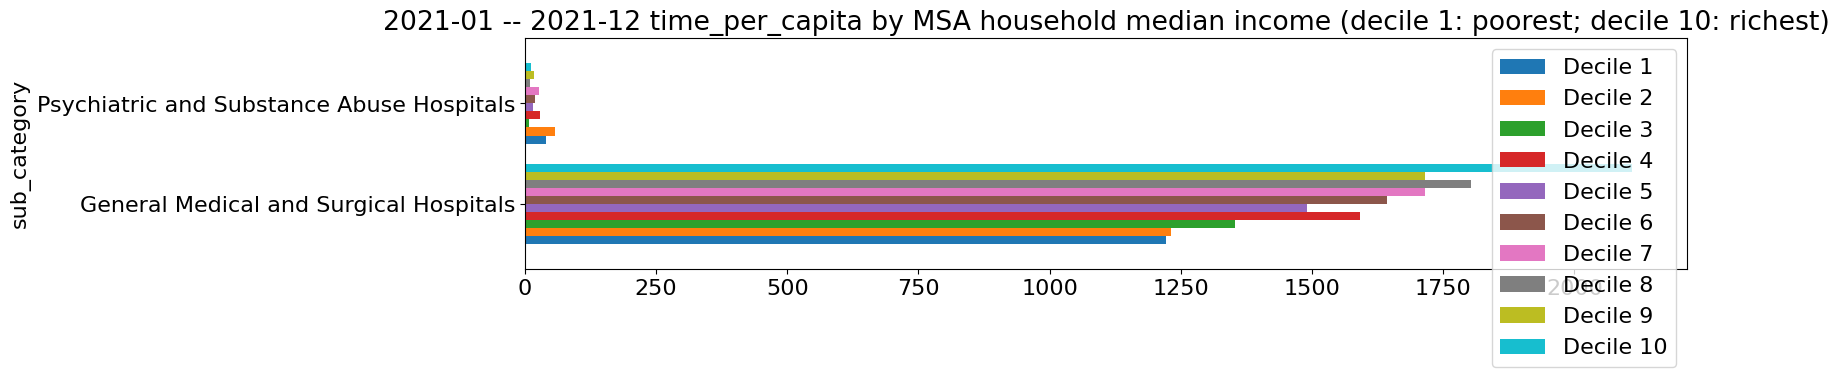

In [77]:
deciles = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

print("MSA:", MSA_names)

target_df = county_POI_time_ACS_MSA_df[county_POI_time_ACS_MSA_df['median_household_income_decile'].isin(deciles)].set_index(f'{POI_level}_category').fillna(0)
target_df_gb = target_df.groupby('median_household_income_decile')

df_list = []
for decile, df in target_df_gb:
    decile_column = f'Decile: {decile:0.0f}'
    # df[decile_column] = df['total_visit_cnt']
    df[decile_column] = df[metric] 
   
    df_list.append(df[[decile_column]])
    
target_df = pd.concat(df_list, axis=1 )
target_df.columns = [f'Decile {i + 1}' for i in range(10)]
fig, ax = plt.subplots(figsize=(15, 1.5 * len(top_k_category)))
ax.set_title(f'{start_time} -- {end_time} {metric} by MSA household median income (decile 1: poorest; decile 10: richest)')
ax = target_df.loc[top_k_category].plot.barh(ax = ax, width=0.8)
plt.savefig(f'{"+".join(MSA_names)}_{metric}_{start_time}-{end_time}.png', dpi=254)
plt.show()

smartphone per capita? 

# Tools

## month sampling rate

In [2]:
import pandas as pd
YEAR = '2022'

In [3]:
# monthly residing files
# residing_all_df = pd.read_csv(r'J:\monthly_patterns_20211211\Panel_overview_data\MonthlyPattern\monthly_home_panel_summary.csv', dtype={'census_block_group':str})
residing_all_df = pd.read_csv(fr'P:\Shared drives\T5\safegraph_bias\US_monthly_home_panel_summary_{YEAR}.zip', dtype={'census_block_group':str}).iloc[:, 1:]
# weekly_residing_df = weekly_residing_df.merge(sociala_variable_df, left_on='census_block_group', right_on='fips')
residing_all_df['census_block_group'] = residing_all_df['census_block_group'].str.zfill(12)
residing_all_df['date_range_start'] = residing_all_df['year'].astype(str).str.zfill(4) + residing_all_df['month'].astype(str).str.zfill(2)
residing_all_df['date_range_end'] = residing_all_df['date_range_start'] 
residing_all_df = residing_all_df.sort_values(['date_range_start', 'date_range_end'])
residing_all_df['date_range_start'] = residing_all_df['year'].astype(str).str.zfill(4) + residing_all_df['month'].astype(str).str.zfill(2)
residing_all_df

,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,date_range_start,date_range_end
0,2022,1,ak,US,020200002021,211,91,202201,202201
1,2022,1,ak,US,021300002001,142,95,202201,202201
2,2022,1,ak,US,020200015003,25,32,202201,202201
3,2022,1,ak,US,020900010002,74,70,202201,202201
4,2022,1,ak,US,020900019003,39,13,202201,202201
...,...,...,...,...,...,...,...,...,...
2644583,2022,12,wy,US,560419753002,66,70,202212,202212
2644584,2022,12,wy,US,560019636003,12,10,202212,202212
2644585,2022,12,wy,US,560210015013,48,40,202212,202212
2644586,2022,12,wy,US,560250011002,124,96,202212,202212


In [4]:
if YEAR > "2019":
    acs_year = '2019'
else:
    acs_year = YEAR

In [6]:
residing_df = residing_all_df[residing_all_df["date_range_start"].astype(str).str.startswith(str(YEAR))] 
residing_df['date_range_start']

0          202201
1          202201
2          202201
3          202201
4          202201
            ...  
2644583    202212
2644584    202212
2644585    202212
2644586    202212
2644587    202212
Name: date_range_start, Length: 2644588, dtype: object

In [9]:
# social_variable_df = pd.read_csv(fr'F:\USC_OneDrive\OneDrive - University of South Carolina\Research\Safegraph_bias\cbg_acs_{acs_year}_county_tract.csv', dtype={'fips':str})
social_variable_df = pd.read_csv(fr'P:\Shared drives\T5\safegraph_bias\cbg_acs_{acs_year}_county_tract.csv', dtype={'fips':str})

social_variable_df['fips'] = social_variable_df['fips'].astype(str).str.zfill(12)
social_variable_df.columns

print("acs_year, US population, male, female:")
acs_year, social_variable_df['totalpopulation'].sum(), social_variable_df['male'].sum(), social_variable_df['female'].sum(), len(social_variable_df)

acs_year, US population, male, female:


('2019', 327939105, 161465237, 166551005, 220333)

In [10]:
social_variable_df.query(" county_fips == 48301 ")

,state_fips,county_fips,tract_fips,fips,state,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore
193788,48,48301,48301950100,483019501001,tx,98,54,44,21,4,0,0,2,9,12,0,25,22,3,0,95,0,3,0,0,0,0,12,71,14,14,43,0,0,0,0,30,0,3,0,0,2,0,0,6,0,3,0,2,13,0,0,1


In [11]:
residing_merged_df = residing_df.merge(social_variable_df, left_on='census_block_group', right_on='fips')
residing_merged_df

,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,date_range_start,date_range_end,state_fips,county_fips,tract_fips,fips,state,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore
0,2022,1,ak,US,020200002021,211,91,202201,202201,2,2020,2020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19
1,2022,2,ak,US,020200002021,198,95,202202,202202,2,2020,2020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19
2,2022,3,ak,US,020200002021,259,184,202203,202203,2,2020,2020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19
3,2022,4,ak,US,020200002021,222,231,202204,202204,2,2020,2020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19
4,2022,5,ak,US,020200002021,281,260,202205,202205,2,2020,2020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640116,2022,10,ca,US,060374303012,0,1,202210,202210,6,6037,6037430301,060374303012,ca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640117,2022,11,ca,US,060374303012,0,2,202211,202211,6,6037,6037430301,060374303012,ca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640118,2022,11,md,US,240359902000,2,1,202211,202211,24,24035,24035990200,240359902000,md,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640119,2022,11,ny,US,360850074000,1,0,202211,202211,36,36085,36085007400,360850074000,ny,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
# residing_merged_df.columns

In [12]:
residing_merged_df['date_range_start'] = residing_merged_df['date_range_start'].astype(str).str[:10]
residing_merged_df['nation_fips'] = 0
residing_merged_df['state_fips'] = residing_merged_df['state_fips'].astype(str).str.zfill(2)
residing_merged_df['county_fips'] = residing_merged_df['county_fips'].astype(str).str.zfill(5)
residing_merged_df['tract_fips'] = residing_merged_df['tract_fips'].astype(str).str.zfill(11)
residing_merged_df['year'] =  residing_merged_df['date_range_start'].astype(str).str[:4]
# residing_merged_df['cbg_fips'] =  residing_merged_df['fips'].astype(str).str[:4]

residing_merged_df.rename(columns={'fips':'cbg_fips'}, inplace=True)
residing_merged_df

,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,date_range_start,date_range_end,state_fips,county_fips,tract_fips,cbg_fips,state,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore,nation_fips
0,2022,1,ak,US,020200002021,211,91,202201,202201,02,02020,02020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19,0
1,2022,2,ak,US,020200002021,198,95,202202,202202,02,02020,02020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19,0
2,2022,3,ak,US,020200002021,259,184,202203,202203,02,02020,02020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19,0
3,2022,4,ak,US,020200002021,222,231,202204,202204,02,02020,02020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19,0
4,2022,5,ak,US,020200002021,281,260,202205,202205,02,02020,02020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640116,2022,10,ca,US,060374303012,0,1,202210,202210,06,06037,06037430301,060374303012,ca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640117,2022,11,ca,US,060374303012,0,2,202211,202211,06,06037,06037430301,060374303012,ca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640118,2022,11,md,US,240359902000,2,1,202211,202211,24,24035,24035990200,240359902000,md,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640119,2022,11,ny,US,360850074000,1,0,202211,202211,36,36085,36085007400,360850074000,ny,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
import numpy as np
def get_sampling_rate(residing_df, aggre_columns):
    # residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]
    aggre_columns = ['date_range_start'] + aggre_columns
    
    sampling_rate_df = residing_df.groupby(aggre_columns).agg(
                                      
                                      start_date=('date_range_start', 'first'), 
                                      end_date=('date_range_start', 'last'), 
                                      CBG_count=('totalpopulation', 'count'), 
                                      fips=(aggre_columns[-1], 'first'), 
                                      device_count=('number_devices_residing', 'sum'), 
                                      population=('totalpopulation', 'sum'), 
                                      year=('year', 'first'),
                                      aggre_column=(aggre_columns[-1], 'first'), 
                                     )
    
    sampling_rate_df['sampling_rate'] = sampling_rate_df['device_count'] / sampling_rate_df['population']
    
    # sampling_rate_df['sampling_rate'] = sampling_rate_df['sampling_rate'].clip(upper=1)
    sampling_rate_df.replace([np.inf], np.nan, inplace=True)
      

    return sampling_rate_df.reset_index().iloc[:, 2:]

def compute_sampling_rates(df, aggre_columns = ['state_fips', 'county_fips', 'tract_fips', 'cbg_fips']):
    df_list = []
    for c in aggre_columns:
        sampling_rate_df = get_sampling_rate(df, aggre_columns=[c])
        df_list.append(sampling_rate_df)
        
    df_all = pd.concat(df_list)
    
    return df_all

df_all = compute_sampling_rates(residing_merged_df, aggre_columns = ['nation_fips', 'state_fips', 'county_fips', 'tract_fips', 'cbg_fips'])
# df_all = compute_sampling_rates(df,                        aggre_columns = ['state_fips', 'county_fips', 'tract_fips', 'cbg_fips'])

df_all['fips_len'] = df_all['fips'].astype(str).str.len()
df_all['fips_level'] = df_all['fips_len'].astype(str)
df_all['fips_level'] = df_all['fips_level'].replace({'1': 'nation', '2':"state", '5':"county", '11': 'tract', '12':'CBG'})

df_all.to_csv(fr'P:\Shared drives\T5\safegraph_bias\US_monthly_sampling_rates_{YEAR}_monthly.csv', index=False)
df_all

,start_date,end_date,CBG_count,fips,device_count,population,year,aggre_column,sampling_rate,fips_len,fips_level
0,202201,202201,219896,0,25525265,327795671,2022,0,0.077869,1,nation
1,202202,202202,219973,0,25408220,327865737,2022,0,0.077496,1,nation
2,202203,202203,220175,0,39475407,327932828,2022,0,0.120377,1,nation
3,202204,202204,220139,0,38813878,327927372,2022,0,0.118361,1,nation
4,202205,202205,220148,0,44094027,327932866,2022,0,0.134461,1,nation
...,...,...,...,...,...,...,...,...,...,...,...
2640116,202212,202212,1,721537506011,10,883,2022,721537506011,0.011325,12,CBG
2640117,202212,202212,1,721537506012,49,2523,2022,721537506012,0.019421,12,CBG
2640118,202212,202212,1,721537506013,27,991,2022,721537506013,0.027245,12,CBG
2640119,202212,202212,1,721537506021,12,1577,2022,721537506021,0.007609,12,CBG


In [24]:
df_all.dropna().query(' fips_level == "CBG"  and start_date == "202201" ' )# ['sampling_rate'].mean()

,start_date,end_date,CBG_count,fips,device_count,population,year,aggre_column,sampling_rate,fips_len,fips_level
0,202201,202201,1,010010201001,277,730,2022,010010201001,0.379452,12,CBG
1,202201,202201,1,010010201002,178,1263,2022,010010201002,0.140934,12,CBG
2,202201,202201,1,010010202001,65,835,2022,010010202001,0.077844,12,CBG
3,202201,202201,1,010010202002,84,1124,2022,010010202002,0.074733,12,CBG
4,202201,202201,1,010010203001,293,2774,2022,010010203001,0.105624,12,CBG
...,...,...,...,...,...,...,...,...,...,...,...
219891,202201,202201,1,721537506011,3,883,2022,721537506011,0.003398,12,CBG
219892,202201,202201,1,721537506012,8,2523,2022,721537506012,0.003171,12,CBG
219893,202201,202201,1,721537506013,8,991,2022,721537506013,0.008073,12,CBG
219894,202201,202201,1,721537506021,5,1577,2022,721537506021,0.003171,12,CBG


In [15]:
df_all.dropna().query(' fips_level == "nation"  and start_date == "201901" ' )#['device_count'].sum()#.sort_values(['sampling_rate', 'population'])

,start_date,end_date,CBG_count,fips,device_count,population,year,aggre_column,sampling_rate,fips_len,fips_level


In [16]:
df_all.dropna().query(' fips_level == "CBG" and population == 0 and start_date == "201901" ' )#['device_count'].sum()#.sort_values(['sampling_rate', 'population'])

,start_date,end_date,CBG_count,fips,device_count,population,year,aggre_column,sampling_rate,fips_len,fips_level


Note: 2020  monthly data has a **max 1432.5 abnormal** sampling rate.

Set the max sampling rate to 1.

In [17]:
# df_all['sampling_rate'].mean(), df_all['sampling_rate'].max(), df_all['sampling_rate'].min() 

for level, df in df_all.groupby('fips_level'):
    # df['sampling_rate'] = df['device_count'] / df['population']
    # df.replace([np.inf], np.nan, inplace=True)
    df = df.dropna()
    print(f"level: {level}", df['sampling_rate'].mean(), df['sampling_rate'].max(), df['sampling_rate'].min() )

level: CBG 0.0986574055163914 1432.5 0.0
level: county 0.09416229580131182 2.4591836734693877 0.001632801161103048
level: nation 0.08395833324691121 0.13446053010130432 0.04932364666243737
level: state 0.08532251108304761 0.18183969150269172 0.006722073877884782
level: tract 0.10759738887892602 1432.5 0.0


In [18]:
df_all['sampling_rate'].max()# .clip(upper=1).max()

1432.5

In [19]:
# find out the abnormal
df_all.query(" population < 5 and fips_level == 'CBG' and  population > 3 ").sort_values(['fips', 'start_date']) # .query(" sampling_rate > 200 and fips_level == 'CBG'  ")

,start_date,end_date,CBG_count,fips,device_count,population,year,aggre_column,sampling_rate,fips_len,fips_level
21392,202201,202201,1,060590218131,203,4,2022,060590218131,50.75,12,CBG
241286,202202,202202,1,060590218131,174,4,2022,060590218131,43.50,12,CBG
461268,202203,202203,1,060590218131,300,4,2022,060590218131,75.00,12,CBG
681442,202204,202204,1,060590218131,335,4,2022,060590218131,83.75,12,CBG
901581,202205,202205,1,060590218131,422,4,2022,060590218131,105.50,12,CBG
...,...,...,...,...,...,...,...,...,...,...,...
1741699,202208,202208,1,510139802001,79,4,2022,510139802001,19.75,12,CBG
1961614,202209,202209,1,510139802001,91,4,2022,510139802001,22.75,12,CBG
2181540,202210,202210,1,510139802001,89,4,2022,510139802001,22.25,12,CBG
2401464,202211,202211,1,510139802001,109,4,2022,510139802001,27.25,12,CBG


In [13]:
def time_aggregate(sampling_rate_df):
    
    rate_gb_df = sampling_rate_df.groupby(['year', 'fips']).agg(
                                      start_date=('start_date', 'first'), 
                                      end_date=('end_date', 'last'), 
                                      period_count=('start_date', 'count'), 
                                      CBG_count=('CBG_count', 'mean'), 
                                      device_count_mean=('device_count', 'mean'), 
                                      population=('population', 'mean'), 
                                      sampling_rate_mean=('sampling_rate', 'mean'),
                                      sampling_rate_max=('sampling_rate', max),
                                      sampling_rate_min=('sampling_rate', min),        
                                     )
    
    return rate_gb_df
    
rate_gb_df = time_aggregate(df_all.iloc[:]).reset_index()# .query(" sampling_rate < 0.5 ")).reset_index()  # remove the outliers
# rate_gb_df.to_csv(r'P:\Shared drives\NJIT_T5\safegraph_bias\sampling_rates_yearly.csv', index=False)
rate_gb_df['fips_len'] = rate_gb_df['fips'].astype(str).str.len()
rate_gb_df['fips_level'] = rate_gb_df['fips_len'].astype(str)
rate_gb_df['fips_level'] = rate_gb_df['fips_level'].replace({'2':"state", '5':"county", '11': 'tract', '12':'cbg'})

rate_gb_df.to_csv(fr'P:\Shared drives\T5\safegraph_bias\sampling_rates_{YEAR}_monthly_yearly.csv', index=False)

rate_gb_df

NameError: name 'df_all' is not defined

In [22]:
rate_gb_df['sampling_rate_mean'].mean(), rate_gb_df['sampling_rate_mean'].max(), rate_gb_df['sampling_rate_mean'].min()

(0.10081107846117049, 465.9166666666667, 0.0)

<AxesSubplot:>

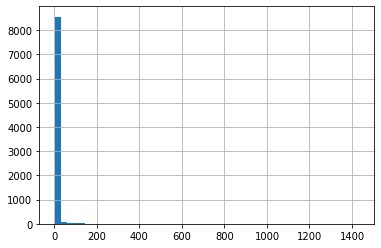

In [26]:
df_all.query(" sampling_rate > 1  and fips_level == 'CBG' ")['sampling_rate'].hist(bins=50)

In [80]:
df_all['sampling_rate'].quantile(0.5)#.hist(bins=500)

0.055299539170506916

## Compute sampling bias

In [14]:
weekly_residing_merged_df = residing_merged_df
weekly_residing_merged_df['fips'] = weekly_residing_merged_df['cbg_fips'].astype(str).str.zfill(12)


weekly_residing_merged_df['Female'] = weekly_residing_merged_df['female'] / weekly_residing_merged_df['totalpopulation']
weekly_residing_merged_df['Male'] = weekly_residing_merged_df['male'] / weekly_residing_merged_df['totalpopulation']
weekly_residing_merged_df['<15'] = (weekly_residing_merged_df['under5years'] + weekly_residing_merged_df['5to9years'] + \
                                    weekly_residing_merged_df['10to14years']) / weekly_residing_merged_df['totalpopulation'] 

weekly_residing_merged_df['15–17'] = (weekly_residing_merged_df['15to17years']) / weekly_residing_merged_df['totalpopulation'] # weekly_residing_merged_df['under5years'] + weekly_residing_merged_df['5to9years'] + \                                     weekly_residing_merged_df['10to14years'] + 
                                    
weekly_residing_merged_df['18–24'] = weekly_residing_merged_df['18to24years'] / weekly_residing_merged_df['totalpopulation']
weekly_residing_merged_df['25–34'] = weekly_residing_merged_df['25to34years'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['35–44'] = weekly_residing_merged_df['35to44years'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['45–54'] = weekly_residing_merged_df['45to54years'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['55–64'] = weekly_residing_merged_df['55to64years'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['>65'] = (weekly_residing_merged_df['65to74years'] + weekly_residing_merged_df['65to74years'] + weekly_residing_merged_df['75to84years'] \
                                       + weekly_residing_merged_df['85yearsandover']) / weekly_residing_merged_df['totalpopulation']

weekly_residing_merged_df['White'] = weekly_residing_merged_df['whitealone'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['Black'] = weekly_residing_merged_df['blackorafricanamericanalone'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['Hispanic'] = weekly_residing_merged_df['Hispanic_or_Latino'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['Asian'] = weekly_residing_merged_df['asianalone'] / weekly_residing_merged_df['totalpopulation']
# Hispanic/Latino
weekly_residing_merged_df['NoSchool'] = weekly_residing_merged_df['population25yearsandoverlessthanhighschool'] / weekly_residing_merged_df['population25yearsandover'] 
weekly_residing_merged_df['HighSchool'] = weekly_residing_merged_df['population25yearsandoverhighschoolgraduateincludesequivalency'] / weekly_residing_merged_df['population25yearsandover'] 
weekly_residing_merged_df['NoCollege'] = (weekly_residing_merged_df['population25yearsandoverlessthanhighschool'] + \
                                            weekly_residing_merged_df['population25yearsandoverhighschoolgraduateincludesequivalency']) \
                                            / weekly_residing_merged_df['population25yearsandover'] 

weekly_residing_merged_df['Bachelor'] = weekly_residing_merged_df['population25yearsandoverbachelorsdegree'] / weekly_residing_merged_df['population25yearsandover'] 
weekly_residing_merged_df['Graduate'] = (weekly_residing_merged_df['population25yearsandovermastersdegree'] + weekly_residing_merged_df['population25yearsandovermastersdegree'] + \
                                               weekly_residing_merged_df['population25yearsandoverdoctoratedegree']) / weekly_residing_merged_df['population25yearsandover']

weekly_residing_merged_df['<20K'] = (weekly_residing_merged_df['householdslessthan10000'] + weekly_residing_merged_df['households10000to14999'] + \
                                               weekly_residing_merged_df['households15000to19999']) / weekly_residing_merged_df['households']   
weekly_residing_merged_df['20K–30K'] = (weekly_residing_merged_df['households20000to24999'] + weekly_residing_merged_df['households25000to29999']) / weekly_residing_merged_df['households']  
weekly_residing_merged_df['30K–50K'] = (weekly_residing_merged_df['households30000to34999'] + weekly_residing_merged_df['households35000to39999'] + \
                                       weekly_residing_merged_df['households40000to44999'] + weekly_residing_merged_df['households45000to49999']) / weekly_residing_merged_df['households']
weekly_residing_merged_df['50K–100K'] = (weekly_residing_merged_df['households50000to59999'] + weekly_residing_merged_df['households60000to74999'] + \
                                        weekly_residing_merged_df['households75000to99999']) / weekly_residing_merged_df['households']

weekly_residing_merged_df['>100K'] = (weekly_residing_merged_df['households100000to124999'] + weekly_residing_merged_df['households125000to149999'] + \
                                        weekly_residing_merged_df['households150000to199999'] + weekly_residing_merged_df['households200000ormore']) / weekly_residing_merged_df['households']

weekly_residing_merged_df['county_fips'] = weekly_residing_merged_df['county_fips'].astype(str).str.zfill(5)
weekly_residing_merged_df['fips'] = weekly_residing_merged_df['fips'].astype(str).str.zfill(12)
weekly_residing_merged_df['state_fips'] = weekly_residing_merged_df['state_fips'].astype(str).str.zfill(2)
weekly_residing_merged_df['tract_fips'] = weekly_residing_merged_df['state_fips'].astype(str).str.zfill(11)


weekly_residing_merged_df.iloc[:, -24:]

,Female,Male,<15,15–17,18–24,25–34,35–44,45–54,55–64,>65,White,Black,Hispanic,Asian,NoSchool,HighSchool,NoCollege,Bachelor,Graduate,<20K,20K–30K,30K–50K,50K–100K,>100K
0,0.50799,0.49201,0.157275,0.034483,0.106812,0.106812,0.07233,0.106812,0.097561,0.296888,0.90328,0.0,0.0,0.050463,0.120146,0.212379,0.332524,0.154126,0.150485,0.261364,0.029221,0.207792,0.285714,0.201299
1,0.50799,0.49201,0.157275,0.034483,0.106812,0.106812,0.07233,0.106812,0.097561,0.296888,0.90328,0.0,0.0,0.050463,0.120146,0.212379,0.332524,0.154126,0.150485,0.261364,0.029221,0.207792,0.285714,0.201299
2,0.50799,0.49201,0.157275,0.034483,0.106812,0.106812,0.07233,0.106812,0.097561,0.296888,0.90328,0.0,0.0,0.050463,0.120146,0.212379,0.332524,0.154126,0.150485,0.261364,0.029221,0.207792,0.285714,0.201299
3,0.50799,0.49201,0.157275,0.034483,0.106812,0.106812,0.07233,0.106812,0.097561,0.296888,0.90328,0.0,0.0,0.050463,0.120146,0.212379,0.332524,0.154126,0.150485,0.261364,0.029221,0.207792,0.285714,0.201299
4,0.50799,0.49201,0.157275,0.034483,0.106812,0.106812,0.07233,0.106812,0.097561,0.296888,0.90328,0.0,0.0,0.050463,0.120146,0.212379,0.332524,0.154126,0.150485,0.261364,0.029221,0.207792,0.285714,0.201299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2640117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2640118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2640119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
from tqdm import tqdm
from datetime import datetime
import os
tqdm.pandas()

columns = ['Female', 'Male',
       '<15', '15–17', '18–24', '25–34', '35–44', '45–54', '55–64', '>65',
       'White', 'Black', 'Hispanic', 'Asian', 'NoSchool', 'HighSchool',
       'NoCollege', 'Bachelor', 'Graduate', '<20K', '20K–30K', '30K–50K',
       '50K–100K', '>100K']

used_columns = ['date_range_start', 'state_fips', 'county_fips', 'tract_fips', 'number_devices_residing', 'totalpopulation'] + columns

def get_bias(df):
    
    # if df.isna().sum() > 0:
    #     print(df)
#     now = datetime.now()
#     current_time = now.strftime("%H:%M:%S")
#     if current_time[-2] == '5':
#         print("Current state:", df.iloc[0]['state_fips'])
        
#     if current_time[-2] == '2':
#         print("Current state:", df.iloc[0]['state_fips'])
    
    df = df.dropna()
    
    aggre_total_device = df['number_devices_residing'].sum()
    aggre_total_pop = df['totalpopulation'].sum()
    
    result_df = pd.DataFrame(columns = [ 'start_date', 'census_ratio', 'safegraph_ratio', 'CBG_count'],
                   index = columns)
    
    result_df.index.name = 'variable'
    
    
    # return result_df
    for column in columns[:]:
        # print(column)
        start_date = df.iloc[0]['date_range_start'][:10] 
        
        # df[column] = df[column] / df['totalpopulation']  # population group ratio of each CBG
        
        cbg_column_devices = df['number_devices_residing'] * df[column]   # population group device count  of each CBG
        # cbg_device_ratio = cbg_column_devices.sum() / state_total_device  # aggregated population group device count / total_device

        cbg_column_pop = df[column] * df['totalpopulation']  # group population  of each CBG        
        census_ratio = cbg_column_pop.sum() / aggre_total_pop   # group population ratio (to the aggregated population)    
        
        safegraph_ratio = cbg_column_devices.sum() / aggre_total_device   # group population device ratio (to the aggregated device count)    
        
        # result_df.loc[column]['variable'] = column
        result_df.loc[column]['start_date'] = start_date
        result_df.loc[column]['CBG_count'] = len(df)
        result_df.loc[column]['census_ratio'] = census_ratio
        result_df.loc[column]['safegraph_ratio'] = safegraph_ratio
        

    return result_df


def get_aggregated_bias(residing_df, aggre_columns):
    
    residing_df.loc[:, 'state_fips'] = residing_df['state_fips'].astype(str).str.zfill(2)
    
    residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]   # have an issue of different starting hours 
    groupby_cols = ['date_range_start'] + aggre_columns
    # return aggre_columns

    bias_df = residing_df.sort_values('date_range_start').groupby(groupby_cols).progress_apply(get_bias)
    
    # return bias_df

    bias_df.reset_index(drop=False, inplace=True)
    # bias_df['start_date'] = bias_df['date_range_start'].astype(str).str[:10] 
    # bias_df = bias_df.drop(columns=['date_range_start'])
    
    # return aggre_columns + ['variable']

    bias_gb_df = bias_df.groupby(aggre_columns + ['variable']).agg(
                                      start_date=('start_date', 'first'), 
                                      end_date=('start_date', 'last'), 
                                      period_count=('CBG_count', 'count'), 
                                      CBG_count=('CBG_count', 'mean'), 
                                      safegraph_ratio_mean=('safegraph_ratio', 'mean'), 
                                      safegraph_ratio_min=('safegraph_ratio', min), 
                                      safegraph_ratio_max=('safegraph_ratio', max),
                                      census_ratio=('census_ratio', 'mean'),
                                      # census_ratio_max=('census_ratio', max),
                                      # census_ratio_min=('census_ratio', min),
                                     )
    
    # return bias_gb_df

    # if len(aggre_columns) == 1:
    #     bias_gb_df = bias_gb_df.loc[:, columns, :]  
    # if len(aggre_columns) == 2:
    #     bias_gb_df = bias_gb_df.loc[:, :, columns, :]  
    # if len(aggre_columns) == 3:
    #     bias_gb_df = bias_gb_df.loc[:, :, :, columns, :]  

    bias_gb_df['safegraph_ratio_mean_to_census'] = bias_gb_df['safegraph_ratio_mean'] / bias_gb_df['census_ratio']
    bias_gb_df['safegraph_ratio_min_to_census' ] = bias_gb_df['safegraph_ratio_min' ] / bias_gb_df['census_ratio']
    bias_gb_df['safegraph_ratio_max_to_census' ] = bias_gb_df['safegraph_ratio_max' ] / bias_gb_df['census_ratio']
    
    bias_gb_df['CBG_count'] = bias_gb_df['CBG_count'].astype(int)
    
    bias_gb_df = bias_gb_df.reset_index()
    bias_gb_df['variable'] = pd.Categorical(bias_gb_df['variable'], categories=columns, ordered=True)

    bias_gb_df = bias_gb_df.sort_values(aggre_columns + ['variable']) #   sort

  
    return bias_gb_df, bias_df

def compute_state_bias():
    save_path = r'P:\Shared drives\T5\safegraph_bias'
    new_name = os.path.join(save_path, f'weekly_bias_state_{YEAR}.csv')
    aggre_columns = ['state_fips']

    # bias_gb_df = get_aggregated_bias(residing_df=SC_residing_df[used_columns], aggre_columns=aggre_columns)
    bias_gb_df, bias_df = get_aggregated_bias(residing_df=residing_merged_df[used_columns].dropna(), aggre_columns=aggre_columns)
    
    bias_gb_df.to_csv(new_name, index=False)
    
    new_name = os.path.join(save_path, f'weekly_bias_state_{YEAR}_time.csv')
    bias_df.to_csv(new_name, index=False)
    
    return bias_gb_df, bias_df

def compute_county_bias():
    save_path = r'P:\Shared drives\T5\safegraph_bias'
    new_name = os.path.join(save_path, f'monthly_bias_county_{YEAR}.csv')

    aggre_columns = ['state_fips', 'county_fips']
    bias_gb_df, bias_df = get_aggregated_bias(residing_df=weekly_residing_merged_df.iloc[:].dropna(), aggre_columns=aggre_columns[:])
    # bias_gb_df = get_aggregated_bias(residing_df=SC_residing_df[used_columns], aggre_columns=aggre_columns[:])
    bias_gb_df.to_csv(new_name, index=False)
    
    new_name = os.path.join(save_path, f'monthly_bias_county_{YEAR}_time.csv')
    bias_df.to_csv(new_name, index=False)
    
    return bias_gb_df, bias_df

def compute_tract_bias():
    save_path = r'P:\Shared drives\T5\safegraph_bias'
    new_name = os.path.join(save_path, f'monthly_bias_tract_{YEAR}.csv')

    aggre_columns = ['state_fips', 'county_fips', 'tract_fips']
    bias_gb_df, bias_df = get_aggregated_bias(residing_df=weekly_residing_merged_df[used_columns].dropna(), aggre_columns=aggre_columns[:])
    # bias_gb_df = get_aggregated_bias(residing_df=SC_residing_df.iloc[:1000], aggre_columns=aggre_columns[:])
    
    bias_gb_df.to_csv(new_name, index=False)
    
    new_name = os.path.join(save_path, f'monthly_bias_tract_{YEAR}_time.csv')
    bias_df.to_csv(new_name, index=False)
    
    return bias_gb_df, bias_df

bias_gb_df, bias_df = compute_state_bias()
# bias_gb_df, bias_df = compute_county_bias()
# bias_gb_df, bias_df = compute_tract_bias()

bias_gb_df.round(2)   

100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [00:15<00:00, 41.59it/s]


,state_fips,variable,start_date,end_date,period_count,CBG_count,safegraph_ratio_mean,safegraph_ratio_min,safegraph_ratio_max,census_ratio,safegraph_ratio_mean_to_census,safegraph_ratio_min_to_census,safegraph_ratio_max_to_census
16,01,Female,202201,202212,12,3431,0.52,0.52,0.52,0.52,1.00,1.00,1.01
20,01,Male,202201,202212,12,3431,0.48,0.48,0.48,0.48,1.00,0.99,1.00
9,01,<15,202201,202212,12,3431,0.14,0.14,0.14,0.15,0.98,0.97,0.99
0,01,15–17,202201,202212,12,3431,0.03,0.03,0.04,0.04,0.99,0.98,1.00
1,01,18–24,202201,202212,12,3431,0.06,0.06,0.06,0.06,1.00,0.98,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,72,<20K,202201,202212,12,2504,0.37,0.36,0.39,0.41,0.92,0.88,0.95
1226,72,20K–30K,202201,202212,12,2504,0.14,0.13,0.14,0.15,0.94,0.90,0.96
1228,72,30K–50K,202201,202212,12,2504,0.18,0.17,0.18,0.18,1.01,0.97,1.04
1231,72,50K–100K,202201,202212,12,2504,0.17,0.16,0.17,0.14,1.20,1.17,1.25


## Merge CSV file

In [11]:
csv_files

['L:\\SafeGraph_monthly_patterns_2018-2022\\2021\\01\\01\\SAFEGRAPH\\MP\\home_panel_summary.csv',
 'L:\\SafeGraph_monthly_patterns_2018-2022\\2021\\02\\01\\SAFEGRAPH\\MP\\home_panel_summary.csv',
 'L:\\SafeGraph_monthly_patterns_2018-2022\\2021\\03\\01\\SAFEGRAPH\\MP\\home_panel_summary.csv',
 'L:\\SafeGraph_monthly_patterns_2018-2022\\2021\\04\\01\\SAFEGRAPH\\MP\\home_panel_summary.csv',
 'L:\\SafeGraph_monthly_patterns_2018-2022\\2021\\05\\01\\SAFEGRAPH\\MP\\home_panel_summary.csv',
 'L:\\SafeGraph_monthly_patterns_2018-2022\\2021\\06\\01\\SAFEGRAPH\\MP\\home_panel_summary.csv',
 'L:\\SafeGraph_monthly_patterns_2018-2022\\2021\\07\\01\\SAFEGRAPH\\MP\\home_panel_summary.csv',
 'L:\\SafeGraph_monthly_patterns_2018-2022\\2021\\08\\01\\SAFEGRAPH\\MP\\home_panel_summary.csv',
 'L:\\SafeGraph_monthly_patterns_2018-2022\\2021\\09\\01\\SAFEGRAPH\\MP\\home_panel_summary.csv',
 'L:\\SafeGraph_monthly_patterns_2018-2022\\2021\\10\\01\\SAFEGRAPH\\MP\\home_panel_summary.csv',
 'L:\\SafeGraph_mont

In [10]:
import os
import pandas as pd



def get_all_files(data_dir, exts=['.csv'], verbose=True):
    all_files = []
    for root_dir, folders, files in os.walk(data_dir):
        # print(root_dir)
        for f in files:
            for ext in exts:
                ext_len = len(ext)
                if ext == f[-ext_len:]:
                    full_name = os.path.join(root_dir, f)
                    all_files.append(full_name)
                    
    if verbose:
        print("Found files:", len(all_files))
    return sorted(all_files)


# csv_files.pop(9)  # Error when downlaoding: 'L:\\SafeGraph_monthly_patterns_2018-2022\\2022\\09\\06\\SAFEGRAPH\\MP\\home_panel_summary.csv',  
# csv_files.pop(11)   # identical to 11-01:  'L:\\SafeGraph_monthly_patterns_2018-2022\\2022\\11\\22\\SAFEGRAPH\\MP\\home_panel_summary.csv',


# YEAR = 2018

years = [2018, 2019, 2020, 2021]
for year in years:
    
    data_dir = fr'L:\SafeGraph_monthly_patterns_2018-2022\{year}'
    
    csv_files = get_all_files(data_dir, exts=['home_panel_summary.csv'])

    
    print("Year:", year)

    df_list = []
    for f in csv_files:
        df = pd.read_csv(f)
        df_list.append(df)

    all_df = pd.concat(df_list)
    print("row count:", len(all_df))
    all_df.to_csv(fr'L:\SafeGraph_monthly_patterns_2018-2022\\{year}\US_monthly_home_panel_summary_{year}.csv', index=False)
all_df

Found files: 12
Year: 2018


C:\Users\N\AppData\Local\Temp\ipykernel_13152\1886231631.py:40: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
C:\Users\N\AppData\Local\Temp\ipykernel_13152\1886231631.py:40: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
C:\Users\N\AppData\Local\Temp\ipykernel_13152\1886231631.py:40: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
C:\Users\N\AppData\Local\Temp\ipykernel_13152\1886231631.py:40: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
C:\Users\N\AppData\Local\Temp\ipykernel_13152\1886231631.py:40: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
C:\Users\N\AppData\Local\Temp\ipykernel_13152\1886231631.py:40: DtypeW

row count: 2643603
Found files: 12
Year: 2019


C:\Users\N\AppData\Local\Temp\ipykernel_13152\1886231631.py:40: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
C:\Users\N\AppData\Local\Temp\ipykernel_13152\1886231631.py:40: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


row count: 2643116
Found files: 12
Year: 2020
row count: 2643048
Found files: 12
Year: 2021


C:\Users\N\AppData\Local\Temp\ipykernel_13152\1886231631.py:40: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


row count: 2640227


,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime
0,2021,1,ak,US,20200015003,19,26
1,2021,1,ak,US,20900010002,35,82
2,2021,1,ak,US,20900019003,20,8
3,2021,1,ak,US,21220004003,49,35
4,2021,1,ak,US,20200013001,71,58
...,...,...,...,...,...,...,...
219745,2021,12,wy,US,560250004002,40,36
219746,2021,12,wy,US,560319594003,70,48
219747,2021,12,wy,US,560159580003,91,52
219748,2021,12,wy,US,560250006002,104,66


## Add a customerized column to the blockgroup POI category aggregation

In [340]:
data_dir = r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_beer_wine\45'
save_dir = r'H:\Safegraph\weekly_county_files\weekly_patterns_time_aggre_2018_2021_tract\POI_beer_wine\45'
os.makedirs(save_dir, exist_ok=True)

def get_all_files(data_dir, exts=['.csv'], prompt=True):
    all_files = []
    for root_dir, folders, files in os.walk(data_dir):
        # print(root_dir)
        for f in files:
            for ext in exts:
                ext_len = len(ext)
                if ext == f[-ext_len:]:
                    full_name = os.path.join(root_dir, f)
                    all_files.append(full_name)
    if prompt:
        print("Found files:", len(CSV_files))
    return sorted(all_files)
                    
CSV_files = get_all_files(data_dir, exts=['.csv'], prompt=True)
# print("Found files:", len(CSV_files))

Found files: 2392


In [341]:
for f in tqdm(CSV_files[:]):
    # print(f)
    df = pd.read_csv(f)
    df['naics_code_customized'] = 'beer_wine'
    count_code = os.path.basename(os.path.dirname(f))
    new_name = os.path.join(save_dir, count_code, os.path.basename(f))
    os.makedirs(os.path.dirname(new_name), exist_ok=True)

    df.to_csv(new_name, index=False)
    # print(len(df))
    
df

100%|█████████████████████████████████████████████████████████████████████████████| 2392/2392 [00:20<00:00, 117.00it/s]


,visitor_home_cbgs,sub_category,naics_code,normalized_sub_catetory_time,normalized_visit_cnt,normalized_visitor_cnt,naics_code_customized
0,450910601022,"Beer, Wine, and Liquor Stores",445310,5934.114693,121.104381,73.456756,beer_wine
1,450910604021,"Beer, Wine, and Liquor Stores",445310,1271.908761,158.988595,146.913512,beer_wine
2,450910605011,"Beer, Wine, and Liquor Stores",445310,684.254713,85.531839,73.456756,beer_wine
3,450910605012,"Beer, Wine, and Liquor Stores",445310,684.254713,85.531839,73.456756,beer_wine
4,450910605021,"Beer, Wine, and Liquor Stores",445310,1539.573105,192.446638,165.277701,beer_wine
5,450910607002,"Beer, Wine, and Liquor Stores",445310,1026.382070,128.297759,110.185134,beer_wine
6,450910608021,"Beer, Wine, and Liquor Stores",445310,5132.790825,119.367228,73.456756,beer_wine
7,450910609042,"Beer, Wine, and Liquor Stores",445310,1163.827014,165.460556,146.913512,beer_wine
8,450910609051,"Beer, Wine, and Liquor Stores",445310,6616.134811,261.762173,220.370268,beer_wine
9,450910609052,"Beer, Wine, and Liquor Stores",445310,684.254713,85.531839,73.456756,beer_wine


## Make the mapping table of NAICS code and category name

In [2]:
import pandas as pd

In [3]:
US_POI_20220103_df = pd.read_csv(r'J:\Safegraph\US_POI_20220103\US_POI_20220103.csv')
print("POI count:", len(US_POI_20220103_df))

POI count: 6786255


In [201]:
US_POI_df = US_POI_20220103_df.dropna(subset='naics_code')
print("After drop NA in NAICS column:", len(US_POI_df))
US_POI_df['naics_code'] = US_POI_df['naics_code'].astype(int)

US_POI_df.sample(3)

After drop NA in NAICS column: 6740404


<ipython-input-201-8bc18d5be520>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_POI_df['naics_code'] = US_POI_df['naics_code'].astype(int)


,placekey,parent_placekey,location_name,safegraph_brand_ids,brands,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,iso_country_code,phone_number,open_hours,category_tags,opened_on,closed_on,tracking_closed_since,geometry_type
2518342,zzy-222@5q2-brv-m6k,NaN,Charlie's Salon And Tanning,NaN,NaN,Personal Care Services,Beauty Salons,812112,39.935828,-91.375091,2501 Bdwy St,Quincy,IL,62301,US,NaN,NaN,NaN,NaN,NaN,2019-07-01,POLYGON
5799160,zzw-222@628-xb9-rx5,NaN,CubeSmart,SG_BRAND_3609f80e8ab3db987d9be5010a726c20,CubeSmart,Lessors of Real Estate,Lessors of Miniwarehouses and Self-Storage Units,531130,41.351074,-73.263680,873 Main St,Monroe,CT,6468,US,1.203262e+10,"{ ""Mon"": [[""9:30"", ""18:00""]], ""Tue"": [[""9:30"",...",NaN,NaN,NaN,2019-12-07,POLYGON
2045603,zzz-222@5qs-w4z-8gk,NaN,Schrock Park,NaN,NaN,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,712190,35.288533,-97.829332,935 W Main St,Tuttle,OK,73089,US,NaN,NaN,NaN,NaN,NaN,2019-07-01,POLYGON


In [211]:
# US_POI_df.query('naics_code ==  445230 ')

NAICS_df = US_POI_df.dropna(subset=['top_category', 'sub_category', 'naics_code']).groupby(['top_category', 'sub_category', 'naics_code'], as_index=False).agg(POI_count=('naics_code', 'count'))
NAICS_df

,top_category,sub_category,naics_code,POI_count
0,"Accounting, Tax Preparation, Bookkeeping, and ...",Other Accounting Services,541219,8309
1,"Accounting, Tax Preparation, Bookkeeping, and ...",Tax Preparation Services,541213,41899
2,Activities Related to Credit Intermediation,"Financial Transactions Processing, Reserve, an...",522320,128
3,Activities Related to Credit Intermediation,Mortgage and Nonmortgage Loan Brokers,522310,19633
4,Activities Related to Credit Intermediation,Other Activities Related to Credit Intermediation,522390,81363
...,...,...,...,...
394,Warehousing and Storage,Refrigerated Warehousing and Storage,493120,696
395,Waste Collection,Other Waste Collection,562119,2597
396,Waste Treatment and Disposal,Hazardous Waste Treatment and Disposal,562211,7017
397,Waste Treatment and Disposal,Solid Waste Landfill,562212,75


In [217]:
NAICS_df['naics_code'].astype(str).str.len().min()

6

In [218]:
NAICS_df.sort_values('naics_code').to_csv(r'J:\Safegraph\US_POI_20220103\US_POI_20220103_NAICS.csv', index=False)

In [348]:
US_POI_20220103_df['top_category'].value_counts()

Restaurants and Other Eating Places                        703695
Lessors of Real Estate                                     567757
Religious Organizations                                    393328
Personal Care Services                                     373251
Offices of Physicians                                      334652
                                                            ...  
Petroleum and Coal Products Manufacturing                       3
Radio and Television Broadcasting                               1
Highway, Street, and Bridge Construction                        1
Deep Sea, Coastal, and Great Lakes Water Transportation         1
Furniture and Home Furnishing Merchant Wholesalers              1
Name: top_category, Length: 198, dtype: int64

In [351]:
US_POI_20220103_df.query("top_category == 'Restaurants and Other Eating Places'").to_csv(r'H:\Safegraph\Open Census Data\restaurants.csv', index=False)

# Check panels

In [2]:
import os
import glob
import pandas as pd

In [24]:
dir_panel = r'J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2019'
csv_files = glob.glob(os.path.join(dir_panel, "*\*home_panel_summary.csv"))
print("File count:", len(csv_files))
# csv_file

File count: 52


In [29]:
df_list = []
for f in csv_files[1:2]:
    df = pd.read_csv(f)
    df_list.append(df)
    
df_all = pd.concat(df_list)
df_all

,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime
0,2019-01-14T00:00:00-05:00,2019-01-21T00:00:00-05:00,ny,US,360810669001,42,38
1,2019-01-14T00:00:00-05:00,2019-01-21T00:00:00-05:00,ny,US,360276100001,1,3
2,2019-01-14T00:00:00-05:00,2019-01-21T00:00:00-05:00,ny,US,361019613002,29,25
3,2019-01-14T00:00:00-05:00,2019-01-21T00:00:00-05:00,ny,US,360290027022,45,43
4,2019-01-14T00:00:00-05:00,2019-01-21T00:00:00-05:00,ny,US,360610226003,114,110
...,...,...,...,...,...,...,...
271985,2019-01-14T00:00:00-05:00,2019-01-21T00:00:00-05:00,md,US,240217676001,47,40
271986,2019-01-14T00:00:00-05:00,2019-01-21T00:00:00-05:00,md,US,240135052031,96,98
271987,2019-01-14T00:00:00-05:00,2019-01-21T00:00:00-05:00,md,US,245102703022,37,34
271988,2019-01-14T00:00:00-05:00,2019-01-21T00:00:00-05:00,md,US,240317008291,70,118


In [30]:
df_all.query("iso_country_code == 'US' ")['number_devices_residing'].sum()

17729387

In [23]:
len(df['date_range_start'].unique())
df['date_range_start'].unique()

array(['2018-12-31T00:00:00-05:00', '2018-12-31T00:00:00-06:00',
       '2018-12-31T00:00:00-08:00', '2018-12-31T00:00:00-07:00',
       '2018-12-31T00:00:00-04:00', '2018-12-31T00:00:00+10:00',
       '2018-12-31T00:00:00-03:30', '2018-12-31T00:00:00-09:00',
       '2018-12-31T00:00:00-10:00', '2018-12-31T00:00:00-11:00'],
      dtype=object)

In [22]:
df['start_date'] = df['date_range_start'].str[:10]
len(df['start_date'].unique())

1

In [15]:
df = pd.read_csv(csv_files[0])
df['start_date'] = df['date_range_start'].str[:10]
len(df['start_date'].unique())
df
df['start_date'].unique()

array(['2019-01-07'], dtype=object)

# compute device simpling rate

In [140]:
import os
import glob
import pandas as pd



In [141]:
dir_panel = r'J:\weekly_patterns_20211211\Panel_overview_data\WeeklyPattern\2019'
csv_files = glob.glob(os.path.join(dir_panel, "*\*home_panel_summary.csv"))
print("File count:", len(csv_files))
# csv_file

File count: 52


In [142]:
df_list = []
for f in csv_files[:]:
    df = pd.read_csv(f)
    df_list.append(df)
    
df_all = pd.concat(df_list)
df_all['census_block_group'] = df_all['census_block_group'].astype(str).str.zfill(12)
df_all['start_date'] = df_all['date_range_start'].str[:10]
df_all['end_date'] = df_all['date_range_end'].str[:10]

df_all

,date_range_start,date_range_end,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,start_date,end_date
0,2019-01-07T00:00:00-05:00,2019-01-14T00:00:00-05:00,ny,US,360470956002,158,131,2019-01-07,2019-01-14
1,2019-01-07T00:00:00-05:00,2019-01-14T00:00:00-05:00,ny,US,360630244013,18,14,2019-01-07,2019-01-14
2,2019-01-07T00:00:00-05:00,2019-01-14T00:00:00-05:00,ny,US,360930209003,41,32,2019-01-07,2019-01-14
3,2019-01-07T00:00:00-05:00,2019-01-14T00:00:00-05:00,ny,US,360811291045,63,47,2019-01-07,2019-01-14
4,2019-01-07T00:00:00-05:00,2019-01-14T00:00:00-05:00,ny,US,360593032013,24,76,2019-01-07,2019-01-14
...,...,...,...,...,...,...,...,...,...
269286,2019-12-30T00:00:00-05:00,2020-01-06T00:00:00-05:00,me,US,230010301001,87,81,2019-12-30,2020-01-06
269287,2019-12-30T00:00:00-05:00,2020-01-06T00:00:00-05:00,me,US,230190005002,33,41,2019-12-30,2020-01-06
269288,2019-12-30T00:00:00-05:00,2020-01-06T00:00:00-05:00,me,US,230310260002,92,88,2019-12-30,2020-01-06
269289,2019-12-30T00:00:00-05:00,2020-01-06T00:00:00-05:00,me,US,230099654001,31,28,2019-12-30,2020-01-06


In [146]:
df_all.groupby(['start_date', 'iso_country_code', 'region'])['number_devices_residing'].sum().reset_index()

,start_date,iso_country_code,region,number_devices_residing
0,2019-01-07,CA,ab,34431
1,2019-01-07,CA,bc,42421
2,2019-01-07,CA,mb,9065
3,2019-01-07,CA,nb,3686
4,2019-01-07,CA,nl,1970
...,...,...,...,...
3623,2019-12-30,US,vt,19491
3624,2019-12-30,US,wa,305929
3625,2019-12-30,US,wi,264639
3626,2019-12-30,US,wv,77759


In [39]:
social_variable_df = pd.read_csv(r'F:\USC_OneDrive\OneDrive - University of South Carolina\Research\Safegraph_bias\cbg_acs_2018_county_tract.csv', dtype={'fips':str})
social_variable_df['fips'] = social_variable_df['fips'].astype(str).str.zfill(12)
social_variable_df.columns
print("US population, male, female:")
social_variable_df['totalpopulation'].sum(), social_variable_df['male'].sum(), social_variable_df['female'].sum(), len(social_variable_df)
social_variable_df

US population, male, female:


,state_fips,county_fips,tract_fips,fips,state,totalpopulation,male,female,under5years,5to9years,...,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore
0,1,1001,1001020100,010010201001,al,636,262,374,20,39,...,28.0,9.0,9.0,4.0,17.0,33.0,0.0,6.0,21.0,0.0
1,1,1001,1001020100,010010201002,al,1287,667,620,54,42,...,4.0,13.0,10.0,51.0,45.0,109.0,42.0,25.0,55.0,24.0
2,1,1001,1001020200,010010202001,al,810,398,412,34,68,...,13.0,28.0,10.0,12.0,20.0,33.0,17.0,5.0,0.0,0.0
3,1,1001,1001020200,010010202002,al,1218,693,525,50,74,...,6.0,38.0,36.0,50.0,14.0,60.0,42.0,14.0,13.0,0.0
4,1,1001,1001020300,010010203001,al,2641,1266,1375,55,127,...,76.0,13.0,30.0,127.0,127.0,85.0,99.0,47.0,22.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,72,72153,72153750601,721537506011,pr,699,413,286,39,76,...,29.0,0.0,21.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
220329,72,72153,72153750601,721537506012,pr,2432,990,1442,127,127,...,34.0,24.0,58.0,77.0,8.0,10.0,0.0,0.0,0.0,0.0
220330,72,72153,72153750601,721537506013,pr,976,366,610,88,38,...,0.0,16.0,0.0,21.0,29.0,0.0,19.0,0.0,0.0,0.0
220331,72,72153,72153750602,721537506021,pr,1707,771,936,55,35,...,43.0,0.0,0.0,9.0,25.0,0.0,0.0,0.0,0.0,0.0


# Check monthly data

In [20]:
import pandas as pd
import censusdata
import glob
import os
from tqdm import tqdm
# import matplotlib.pyplot as plt
import random
import geopandas as gpd
from datetime import datetime


# from matplotlib.font_manager import FontManager
# fm = FontManager()
# mat_fonts = set(f.name for f in fm.ttflist)
# print(mat_fonts)

import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['DengXian']
plt.rcParams.update({'font.size': 16})
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option("display.max_colwidth", 100)

ModuleNotFoundError: No module named 'censusdata'

In [21]:
YEAR = '2022'

if YEAR > "2019":
    acs_year = '2019'
else:
    acs_year = YEAR

In [39]:
# social_variable_df = pd.read_csv(fr'F:\USC_OneDrive\OneDrive - University of South Carolina\Research\Safegraph_bias\cbg_acs_{acs_year}_county_tract.csv', dtype={'fips':str})
social_variable_df = pd.read_csv(fr'P:\Shared drives\T5\safegraph_bias\cbg_acs_{acs_year}_county_tract.csv', dtype={'fips':str})

social_variable_df['fips'] = social_variable_df['fips'].astype(str).str.zfill(12)
social_variable_df.columns
print("US population, male, female:")
social_variable_df['totalpopulation'].sum(), social_variable_df['male'].sum(), social_variable_df['female'].sum(), len(social_variable_df)

US population, male, female:


(327939105, 161465237, 166551005, 220333)

In [40]:
# monthly residing files
# monthly_residing_all_df = pd.read_csv(r'J:\monthly_patterns_20211211\Panel_overview_data\MonthlyPattern\monthly_home_panel_summary.csv', dtype={'census_block_group':str})
monthly_residing_all_df = pd.read_csv(fr'P:\Shared drives\T5\safegraph_bias\US_monthly_home_panel_summary_{YEAR}.zip', dtype={'census_block_group':str}).iloc[:, 1:]  # .drop('Unnamed: 0')

monthly_residing_all_df['census_block_group'] = monthly_residing_all_df['census_block_group'].str.zfill(12)

In [41]:
monthly_residing_all_df

,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime
0,2022,1,ak,US,020200002021,211,91
1,2022,1,ak,US,021300002001,142,95
2,2022,1,ak,US,020200015003,25,32
3,2022,1,ak,US,020900010002,74,70
4,2022,1,ak,US,020900019003,39,13
...,...,...,...,...,...,...,...
2644583,2022,12,wy,US,560419753002,66,70
2644584,2022,12,wy,US,560019636003,12,10
2644585,2022,12,wy,US,560210015013,48,40
2644586,2022,12,wy,US,560250011002,124,96


In [42]:
monthly_residing_all_df['date_range_start'] = monthly_residing_all_df['year'].astype(str).str.zfill(4) + monthly_residing_all_df['month'].astype(str).str.zfill(2)

In [173]:
# monthly_residing_df['date_range_start'].value_counts()
# monthly_residing_df["date_range_start"].astype(str).str.startswith(str(YEAR))

In [43]:
monthly_residing_df = monthly_residing_all_df[monthly_residing_all_df["date_range_start"].astype(str).str.startswith(str(YEAR))] 

monthly_residing_df['date_range_start']

0          202201
1          202201
2          202201
3          202201
4          202201
            ...  
2644583    202212
2644584    202212
2644585    202212
2644586    202212
2644587    202212
Name: date_range_start, Length: 2644588, dtype: object

In [44]:
monthly_residing_df['date_range_end'] = monthly_residing_df['date_range_start'] 
monthly_residing_df

,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,date_range_start,date_range_end
0,2022,1,ak,US,020200002021,211,91,202201,202201
1,2022,1,ak,US,021300002001,142,95,202201,202201
2,2022,1,ak,US,020200015003,25,32,202201,202201
3,2022,1,ak,US,020900010002,74,70,202201,202201
4,2022,1,ak,US,020900019003,39,13,202201,202201
...,...,...,...,...,...,...,...,...,...
2644583,2022,12,wy,US,560419753002,66,70,202212,202212
2644584,2022,12,wy,US,560019636003,12,10,202212,202212
2644585,2022,12,wy,US,560210015013,48,40,202212,202212
2644586,2022,12,wy,US,560250011002,124,96,202212,202212


In [45]:
monthly_residing_df = monthly_residing_df.sort_values(['date_range_start', 'date_range_end'])

In [46]:
month_residing_merged_df = monthly_residing_df.merge(social_variable_df, left_on='census_block_group', right_on='fips')
month_residing_merged_df

,year,month,region,iso_country_code,census_block_group,number_devices_residing,number_devices_primary_daytime,date_range_start,date_range_end,state_fips,county_fips,tract_fips,fips,state,totalpopulation,male,female,under5years,5to9years,10to14years,15to17years,18to24years,25to34years,35to44years,45to54years,55to64years,65to74years,75to84years,85yearsandover,whitealone,blackorafricanamericanalone,americanindianandalaskanativealone,asianalone,nativehawaiianandotherpacificislanderalone,someotherracealone,twoormoreraces,Hispanic_or_Latino,population25yearsandover,population25yearsandoverlessthanhighschool,population25yearsandoverhighschoolgraduateincludesequivalency,population25yearsandoversomecollege,population25yearsandoverbachelorsdegree,population25yearsandovermastersdegree,population25yearsandoverprofessionalschooldegree,population25yearsandoverdoctoratedegree,households,householdslessthan10000,households10000to14999,households15000to19999,households20000to24999,households25000to29999,households30000to34999,households35000to39999,households40000to44999,households45000to49999,households50000to59999,households60000to74999,households75000to99999,households100000to124999,households125000to149999,households150000to199999,households200000ormore
0,2022,1,ak,US,020200002021,211,91,202201,202201,2,2020,2020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19
1,2022,2,ak,US,020200002021,198,95,202202,202202,2,2020,2020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19
2,2022,3,ak,US,020200002021,259,184,202203,202203,2,2020,2020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19
3,2022,4,ak,US,020200002021,222,231,202204,202204,2,2020,2020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19
4,2022,5,ak,US,020200002021,281,260,202205,202205,2,2020,2020000202,020200002021,ak,1189,585,604,89,76,22,41,127,127,86,127,116,117,80,39,1074,0,5,60,0,50,0,0,824,99,175,127,127,62,0,0,616,19,83,59,0,18,72,35,0,21,13,127,36,0,72,33,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640116,2022,10,ca,US,060374303012,0,1,202210,202210,6,6037,6037430301,060374303012,ca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640117,2022,11,ca,US,060374303012,0,2,202211,202211,6,6037,6037430301,060374303012,ca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640118,2022,11,md,US,240359902000,2,1,202211,202211,24,24035,24035990200,240359902000,md,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640119,2022,11,ny,US,360850074000,1,0,202211,202211,36,36085,36085007400,360850074000,ny,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# SC_residing_df = month_residing_merged_df[month_residing_merged_df["date_range_start"].str.startswith(str(YEAR))].query("region == 'sc'")
# SC_residing_df

In [49]:
month_residing_merged_df['Female'] = month_residing_merged_df['female'] / month_residing_merged_df['totalpopulation']
month_residing_merged_df['Male'] = month_residing_merged_df['male'] / month_residing_merged_df['totalpopulation']
month_residing_merged_df['<15'] = (month_residing_merged_df['under5years'] + month_residing_merged_df['5to9years'] + \
                                    month_residing_merged_df['10to14years']) / month_residing_merged_df['totalpopulation'] 

month_residing_merged_df['15–17'] = (month_residing_merged_df['15to17years']) / month_residing_merged_df['totalpopulation'] #monthly_residing_merged_df['under5years'] + monthly_residing_merged_df['5to9years'] + \                                     weekly_residing_merged_df['10to14years'] + 
                                    
month_residing_merged_df['18–24'] = month_residing_merged_df['18to24years'] / month_residing_merged_df['totalpopulation']
month_residing_merged_df['25–34'] = month_residing_merged_df['25to34years'] / month_residing_merged_df['totalpopulation'] 
month_residing_merged_df['35–44'] = month_residing_merged_df['35to44years'] / month_residing_merged_df['totalpopulation'] 
month_residing_merged_df['45–54'] = month_residing_merged_df['45to54years'] / month_residing_merged_df['totalpopulation'] 
month_residing_merged_df['55–64'] = month_residing_merged_df['55to64years'] / month_residing_merged_df['totalpopulation'] 
month_residing_merged_df['>65'] = (month_residing_merged_df['65to74years'] + month_residing_merged_df['65to74years'] + month_residing_merged_df['75to84years'] \
                                       + month_residing_merged_df['85yearsandover']) / month_residing_merged_df['totalpopulation']

month_residing_merged_df['White'] = month_residing_merged_df['whitealone'] / month_residing_merged_df['totalpopulation'] 
month_residing_merged_df['Black'] = month_residing_merged_df['blackorafricanamericanalone'] / month_residing_merged_df['totalpopulation'] 
month_residing_merged_df['Hispanic'] = month_residing_merged_df['Hispanic_or_Latino'] / month_residing_merged_df['totalpopulation'] 
month_residing_merged_df['Asian'] = month_residing_merged_df['asianalone'] / month_residing_merged_df['totalpopulation']
# Hispanic/Latino
month_residing_merged_df['NoSchool'] = month_residing_merged_df['population25yearsandoverlessthanhighschool'] / month_residing_merged_df['population25yearsandover'] 
month_residing_merged_df['HighSchool'] = month_residing_merged_df['population25yearsandoverhighschoolgraduateincludesequivalency'] / month_residing_merged_df['population25yearsandover'] 
month_residing_merged_df['NoCollege'] = (month_residing_merged_df['population25yearsandoverlessthanhighschool'] + \
                                            month_residing_merged_df['population25yearsandoverhighschoolgraduateincludesequivalency']) \
                                            / month_residing_merged_df['population25yearsandover'] 

month_residing_merged_df['Bachelor'] = month_residing_merged_df['population25yearsandoverbachelorsdegree'] / month_residing_merged_df['population25yearsandover'] 
month_residing_merged_df['Graduate'] = (month_residing_merged_df['population25yearsandovermastersdegree'] + month_residing_merged_df['population25yearsandoverprofessionalschooldegree'] + \
                                               month_residing_merged_df['population25yearsandoverdoctoratedegree']) / month_residing_merged_df['population25yearsandover']

month_residing_merged_df['<20K'] = (month_residing_merged_df['householdslessthan10000'] + month_residing_merged_df['households10000to14999'] + \
                                               month_residing_merged_df['households15000to19999']) / month_residing_merged_df['households']   
month_residing_merged_df['20K–30K'] = (month_residing_merged_df['households20000to24999'] + month_residing_merged_df['households25000to29999']) / month_residing_merged_df['households']  
month_residing_merged_df['30K–50K'] = (month_residing_merged_df['households30000to34999'] + month_residing_merged_df['households35000to39999'] + \
                                       month_residing_merged_df['households40000to44999'] + month_residing_merged_df['households45000to49999']) / month_residing_merged_df['households']
month_residing_merged_df['50K–100K'] = (month_residing_merged_df['households50000to59999'] + month_residing_merged_df['households60000to74999'] + \
                                        month_residing_merged_df['households75000to99999']) / month_residing_merged_df['households']

month_residing_merged_df['>100K'] = (month_residing_merged_df['households100000to124999'] + month_residing_merged_df['households125000to149999'] + \
                                        month_residing_merged_df['households150000to199999'] + month_residing_merged_df['households200000ormore']) / month_residing_merged_df['households']

month_residing_merged_df['county_fips'] = month_residing_merged_df['county_fips'].astype(str).str.zfill(5)
month_residing_merged_df.iloc[:, -24:]

,Female,Male,<15,15–17,18–24,25–34,35–44,45–54,55–64,>65,White,Black,Hispanic,Asian,NoSchool,HighSchool,NoCollege,Bachelor,Graduate,<20K,20K–30K,30K–50K,50K–100K,>100K
0,0.50799,0.49201,0.157275,0.034483,0.106812,0.106812,0.07233,0.106812,0.097561,0.296888,0.90328,0.0,0.0,0.050463,0.120146,0.212379,0.332524,0.154126,0.150485,0.261364,0.029221,0.207792,0.285714,0.201299
1,0.50799,0.49201,0.157275,0.034483,0.106812,0.106812,0.07233,0.106812,0.097561,0.296888,0.90328,0.0,0.0,0.050463,0.120146,0.212379,0.332524,0.154126,0.150485,0.261364,0.029221,0.207792,0.285714,0.201299
2,0.50799,0.49201,0.157275,0.034483,0.106812,0.106812,0.07233,0.106812,0.097561,0.296888,0.90328,0.0,0.0,0.050463,0.120146,0.212379,0.332524,0.154126,0.150485,0.261364,0.029221,0.207792,0.285714,0.201299
3,0.50799,0.49201,0.157275,0.034483,0.106812,0.106812,0.07233,0.106812,0.097561,0.296888,0.90328,0.0,0.0,0.050463,0.120146,0.212379,0.332524,0.154126,0.150485,0.261364,0.029221,0.207792,0.285714,0.201299
4,0.50799,0.49201,0.157275,0.034483,0.106812,0.106812,0.07233,0.106812,0.097561,0.296888,0.90328,0.0,0.0,0.050463,0.120146,0.212379,0.332524,0.154126,0.150485,0.261364,0.029221,0.207792,0.285714,0.201299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2640117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2640118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2640119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
from tqdm import tqdm
from datetime import datetime
tqdm.pandas()

columns = ['Female', 'Male',
       '<15', '15–17', '18–24', '25–34', '35–44', '45–54', '55–64', '>65',
       'White', 'Black', 'Hispanic', 'Asian', 'NoSchool', 'HighSchool',
       'NoCollege', 'Bachelor', 'Graduate', '<20K', '20K–30K', '30K–50K',
       '50K–100K', '>100K']

used_columns = ['date_range_start', 'state_fips', 'county_fips', 'tract_fips', 'number_devices_residing', 'totalpopulation'] + columns

def get_bias(df):
    
    # if df.isna().sum() > 0:
    #     print(df)
#     now = datetime.now()
#     current_time = now.strftime("%H:%M:%S")
#     if current_time[-2] == '5':
#         print("Current state:", df.iloc[0]['state_fips'])
        
#     if current_time[-2] == '2':
#         print("Current state:", df.iloc[0]['state_fips'])
    
    df = df.dropna()
    
    aggre_total_device = df['number_devices_residing'].sum()
    aggre_total_pop = df['totalpopulation'].sum()
    
    result_df = pd.DataFrame(columns = [ 'start_date', 'census_ratio', 'safegraph_ratio', 'CBG_count'],
                   index = columns)
    
    result_df.index.name = 'variable'
    
    
    # return result_df
    for column in columns[:]:
        # print(column)
        start_date = df.iloc[0]['date_range_start'][:10] 
        
        # df[column] = df[column] / df['totalpopulation']  # population group ratio of each CBG
        
        cbg_column_devices = df['number_devices_residing'] * df[column]   # population group device count  of each CBG
        # cbg_device_ratio = cbg_column_devices.sum() / state_total_device  # aggregated population group device count / total_device

        cbg_column_pop = df[column] * df['totalpopulation']  # group population  of each CBG        
        census_ratio = cbg_column_pop.sum() / aggre_total_pop   # group population ratio (to the aggregated population)    
        
        safegraph_ratio = cbg_column_devices.sum() / aggre_total_device   # group population device ratio (to the aggregated device count)    
        
        # result_df.loc[column]['variable'] = column
        result_df.loc[column]['start_date'] = start_date
        result_df.loc[column]['CBG_count'] = len(df)
        result_df.loc[column]['census_ratio'] = census_ratio
        result_df.loc[column]['safegraph_ratio'] = safegraph_ratio
        

    return result_df


def get_aggregated_bias(residing_df, aggre_columns):
    
    residing_df.loc[:, 'state_fips'] = residing_df['state_fips'].astype(str).str.zfill(2)
    
    residing_df['date_range_start'] = residing_df['date_range_start'].astype(str).str[:10]   # have an issue of different starting hours 
    groupby_cols = ['date_range_start'] + aggre_columns
    # return aggre_columns

    bias_df = residing_df.sort_values('date_range_start').groupby(groupby_cols).progress_apply(get_bias)
    bias_df['safegraph_ratio_to_census'] = bias_df['safegraph_ratio'] / bias_df['census_ratio']
    bias_df['bias'] = bias_df['safegraph_ratio_to_census'] - 1
    

    bias_df.reset_index(drop=False, inplace=True)
    
    # return bias_df
    # bias_df['start_date'] = bias_df['date_range_start'].astype(str).str[:10] 
    # bias_df = bias_df.drop(columns=['date_range_start'])
    
    # return aggre_columns + ['variable']

    bias_gb_df = bias_df.groupby(aggre_columns + ['variable']).agg(
                                      start_date=('start_date', 'first'), 
                                      end_date=('start_date', 'last'), 
                                      period_count=('CBG_count', 'count'), 
                                      CBG_count=('CBG_count', 'mean'), 
                                      safegraph_ratio_mean=('safegraph_ratio', 'mean'), 
                                      safegraph_ratio_min=('safegraph_ratio', min), 
                                      safegraph_ratio_max=('safegraph_ratio', max),
                                      census_ratio=('census_ratio', 'mean'),
                                      # census_ratio_max=('census_ratio', max),
                                      # census_ratio_min=('census_ratio', min),
                                     )
    
    # return bias_gb_df

    # if len(aggre_columns) == 1:
    #     bias_gb_df = bias_gb_df.loc[:, columns, :]  
    # if len(aggre_columns) == 2:
    #     bias_gb_df = bias_gb_df.loc[:, :, columns, :]  
    # if len(aggre_columns) == 3:
    #     bias_gb_df = bias_gb_df.loc[:, :, :, columns, :]  

    bias_gb_df['safegraph_ratio_mean_to_census'] = bias_gb_df['safegraph_ratio_mean'] / bias_gb_df['census_ratio']
    bias_gb_df['safegraph_ratio_min_to_census' ] = bias_gb_df['safegraph_ratio_min' ] / bias_gb_df['census_ratio']
    bias_gb_df['safegraph_ratio_max_to_census' ] = bias_gb_df['safegraph_ratio_max' ] / bias_gb_df['census_ratio']
    
    bias_gb_df['CBG_count'] = bias_gb_df['CBG_count'].astype(int)
    
    bias_gb_df = bias_gb_df.reset_index()
    bias_gb_df['variable'] = pd.Categorical(bias_gb_df['variable'], categories=columns, ordered=True)

    bias_gb_df = bias_gb_df.sort_values(aggre_columns + ['variable']) #   sort

  
    return bias_gb_df, bias_df

def compute_state_bias():
    save_path = r'P:\Shared drives\T5\safegraph_bias'
    new_name = os.path.join(save_path, f'monthly_bias_state_{YEAR}.csv')
    aggre_columns = ['state_fips']

    # bias_gb_df = get_aggregated_bias(residing_df=SC_residing_df[used_columns], aggre_columns=aggre_columns)
    bias_gb_df, bias_df = get_aggregated_bias(residing_df=month_residing_merged_df[used_columns].dropna(), aggre_columns=aggre_columns)
    
    bias_gb_df.to_csv(new_name, index=False)
    
    new_name = os.path.join(save_path, f'monthly_bias_state_{YEAR}_time.csv')
    bias_df.to_csv(new_name, index=False)
    
    return bias_gb_df, bias_df

def compute_county_bias():
    save_path = r'P:\Shared drives\T5\safegraph_bias'
    new_name = os.path.join(save_path, f'monthly_bias_county_{YEAR}.csv')

    aggre_columns = ['state_fips', 'county_fips']
    bias_gb_df, bias_df = get_aggregated_bias(residing_df=month_residing_merged_df.iloc[:].dropna(), aggre_columns=aggre_columns[:])
    # bias_gb_df, bias_df = get_aggregated_bias(residing_df=SC_residing_df[used_columns].dropna(), aggre_columns=aggre_columns[:])
    bias_gb_df.to_csv(new_name, index=False)
    
    new_name = os.path.join(save_path, f'monthly_bias_county_{YEAR}_time.csv')
    bias_df.to_csv(new_name, index=False)
    
    return bias_gb_df, bias_df

def compute_tract_bias():
    save_path = r'P:\Shared drives\T5\safegraph_bias'
    new_name = os.path.join(save_path, f'monthly_bias_tract_{YEAR}.csv')

    aggre_columns = ['state_fips', 'county_fips', 'tract_fips']
    bias_gb_df, bias_df = get_aggregated_bias(residing_df=month_residing_merged_df[used_columns].dropna(), aggre_columns=aggre_columns[:])
    # bias_gb_df = get_aggregated_bias(residing_df=SC_residing_df.iloc[:1000], aggre_columns=aggre_columns[:])
    
    bias_gb_df.to_csv(new_name, index=False)
    
    new_name = os.path.join(save_path, f'monthly_bias_tract_{YEAR}_time.csv')
    bias_df.to_csv(new_name, index=False)
    
    return bias_gb_df, bias_df

# bias_gb_df, bias_df = compute_state_bias()
bias_gb_df, bias_df = compute_county_bias()
# bias_gb_df, bias_df = compute_tract_bias()

bias_gb_df.round(2)   

100%|████████████████████████████████████████████████████████████████████████████| 38640/38640 [12:10<00:00, 52.91it/s]


,state_fips,county_fips,variable,start_date,end_date,period_count,CBG_count,safegraph_ratio_mean,safegraph_ratio_min,safegraph_ratio_max,census_ratio,safegraph_ratio_mean_to_census,safegraph_ratio_min_to_census,safegraph_ratio_max_to_census
16,01,01001,Female,202201,202212,12,32,0.52,0.52,0.52,0.51,1.01,1.00,1.02
20,01,01001,Male,202201,202212,12,32,0.48,0.48,0.48,0.49,0.99,0.98,1.00
9,01,01001,<15,202201,202212,12,32,0.13,0.13,0.14,0.14,0.95,0.92,0.97
0,01,01001,15–17,202201,202212,12,32,0.04,0.04,0.04,0.04,1.00,0.99,1.01
1,01,01001,18–24,202201,202212,12,32,0.06,0.06,0.06,0.06,1.03,1.01,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77266,72,72153,<20K,202201,202212,12,27,0.47,0.46,0.48,0.49,0.96,0.94,0.98
77258,72,72153,20K–30K,202201,202212,12,27,0.16,0.15,0.17,0.15,1.08,1.03,1.12
77260,72,72153,30K–50K,202201,202212,12,27,0.16,0.16,0.17,0.15,1.08,1.02,1.13
77263,72,72153,50K–100K,202201,202212,12,27,0.11,0.10,0.12,0.09,1.18,1.08,1.29


In [51]:
bias_df

,date_range_start,state_fips,variable,start_date,census_ratio,safegraph_ratio,CBG_count,safegraph_ratio_to_census,bias
0,202201,01,Female,202201,0.516106,0.517215,3431,1.002148,0.002148
1,202201,01,Male,202201,0.483894,0.482785,3431,0.997709,-0.002291
2,202201,01,<15,202201,0.145877,0.143533,3431,0.983932,-0.016068
3,202201,01,15–17,202201,0.035232,0.034817,3431,0.988234,-0.011766
4,202201,01,18–24,202201,0.059505,0.059248,3431,0.995684,-0.004316
...,...,...,...,...,...,...,...,...,...
14971,202212,72,<20K,202212,0.407952,0.373542,2525,0.915651,-0.084349
14972,202212,72,20K–30K,202212,0.146315,0.140412,2525,0.959651,-0.040349
14973,202212,72,30K–50K,202212,0.175004,0.180687,2525,1.032476,0.032476
14974,202212,72,50K–100K,202212,0.139667,0.164429,2525,1.177294,0.177294


In [181]:
stop

NameError: name 'stop' is not defined

In [ ]:
bias_df.query("variable == 'Female' and county_fips == 45001 ")['safegraph_ratio'].mean()

In [ ]:
bias_gb_df

# Test

In [187]:
acs_year = 2019
social_variable_df = pd.read_csv(fr'F:\USC_OneDrive\OneDrive - University of South Carolina\Research\Safegraph_bias\cbg_acs_{acs_year}_county_tract.csv', dtype={'fips':str})
social_variable_df['fips'] = social_variable_df['fips'].astype(str).str.zfill(12)
social_variable_df.columns

print("acs_year, US population, male, female:")
acs_year, social_variable_df['totalpopulation'].sum(), social_variable_df['male'].sum(), social_variable_df['female'].sum(), len(social_variable_df)

acs_year, US population, male, female:


(2019, 327939105, 161465237, 166551005, 220333)

In [200]:
social_variable_df.columns

Index(['state_fips', 'county_fips', 'tract_fips', 'fips', 'state',
       'totalpopulation', 'male', 'female', 'under5years', '5to9years',
       '10to14years', '15to17years', '18to24years', '25to34years',
       '35to44years', '45to54years', '55to64years', '65to74years',
       '75to84years', '85yearsandover', 'whitealone',
       'blackorafricanamericanalone', 'americanindianandalaskanativealone',
       'asianalone', 'nativehawaiianandotherpacificislanderalone',
       'someotherracealone', 'twoormoreraces', 'Hispanic_or_Latino',
       'population25yearsandover',
       'population25yearsandoverlessthanhighschool',
       'population25yearsandoverhighschoolgraduateincludesequivalency',
       'population25yearsandoversomecollege',
       'population25yearsandoverbachelorsdegree',
       'population25yearsandovermastersdegree',
       'population25yearsandoverprofessionalschooldegree',
       'population25yearsandoverdoctoratedegree', 'households',
       'householdslessthan10000', 

In [190]:
weekly_residing_merged_df = social_variable_df

weekly_residing_merged_df['Female'] = weekly_residing_merged_df['female'] / weekly_residing_merged_df['totalpopulation']
weekly_residing_merged_df['Male'] = weekly_residing_merged_df['male'] / weekly_residing_merged_df['totalpopulation']
weekly_residing_merged_df['<15'] = (weekly_residing_merged_df['under5years'] + weekly_residing_merged_df['5to9years'] + \
                                    weekly_residing_merged_df['10to14years']) / weekly_residing_merged_df['totalpopulation'] 

weekly_residing_merged_df['15–17'] = (weekly_residing_merged_df['15to17years']) / weekly_residing_merged_df['totalpopulation'] # weekly_residing_merged_df['under5years'] + weekly_residing_merged_df['5to9years'] + \                                     weekly_residing_merged_df['10to14years'] + 
                                    
weekly_residing_merged_df['18–24'] = weekly_residing_merged_df['18to24years'] / weekly_residing_merged_df['totalpopulation']
weekly_residing_merged_df['25–34'] = weekly_residing_merged_df['25to34years'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['35–44'] = weekly_residing_merged_df['35to44years'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['45–54'] = weekly_residing_merged_df['45to54years'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['55–64'] = weekly_residing_merged_df['55to64years'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['>65'] = (weekly_residing_merged_df['65to74years'] + weekly_residing_merged_df['65to74years'] + weekly_residing_merged_df['75to84years'] \
                                       + weekly_residing_merged_df['85yearsandover']) / weekly_residing_merged_df['totalpopulation']

weekly_residing_merged_df['White'] = weekly_residing_merged_df['whitealone'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['Black'] = weekly_residing_merged_df['blackorafricanamericanalone'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['Hispanic'] = weekly_residing_merged_df['Hispanic_or_Latino'] / weekly_residing_merged_df['totalpopulation'] 
weekly_residing_merged_df['Asian'] = weekly_residing_merged_df['asianalone'] / weekly_residing_merged_df['totalpopulation']
# Hispanic/Latino
weekly_residing_merged_df['Less_Than_High_School'] = weekly_residing_merged_df['population25yearsandoverlessthanhighschool'] / weekly_residing_merged_df['population25yearsandover'] 
weekly_residing_merged_df['High_School'] = weekly_residing_merged_df['population25yearsandoverhighschoolgraduateincludesequivalency'] / weekly_residing_merged_df['population25yearsandover'] 
weekly_residing_merged_df['No_College'] = (weekly_residing_merged_df['population25yearsandoverlessthanhighschool'] + \
                                            weekly_residing_merged_df['population25yearsandoverhighschoolgraduateincludesequivalency']) \
                                            / weekly_residing_merged_df['population25yearsandover'] 

weekly_residing_merged_df['Bachelor'] = weekly_residing_merged_df['population25yearsandoverbachelorsdegree'] / weekly_residing_merged_df['population25yearsandover'] 
weekly_residing_merged_df['Graduate'] = (weekly_residing_merged_df['population25yearsandovermastersdegree'] + weekly_residing_merged_df['population25yearsandovermastersdegree'] + \
                                               weekly_residing_merged_df['population25yearsandoverdoctoratedegree']) / weekly_residing_merged_df['population25yearsandover']

weekly_residing_merged_df['<20K'] = (weekly_residing_merged_df['householdslessthan10000'] + weekly_residing_merged_df['households10000to14999'] + \
                                               weekly_residing_merged_df['households15000to19999']) / weekly_residing_merged_df['households']   
weekly_residing_merged_df['20K–30K'] = (weekly_residing_merged_df['households20000to24999'] + weekly_residing_merged_df['households25000to29999']) / weekly_residing_merged_df['households']  
weekly_residing_merged_df['30K–50K'] = (weekly_residing_merged_df['households30000to34999'] + weekly_residing_merged_df['households35000to39999'] + \
                                       weekly_residing_merged_df['households40000to44999'] + weekly_residing_merged_df['households45000to49999']) / weekly_residing_merged_df['households']
weekly_residing_merged_df['50K–100K'] = (weekly_residing_merged_df['households50000to59999'] + weekly_residing_merged_df['households60000to74999'] + \
                                        weekly_residing_merged_df['households75000to99999']) / weekly_residing_merged_df['households']

weekly_residing_merged_df['>100K'] = (weekly_residing_merged_df['households100000to124999'] + weekly_residing_merged_df['households125000to149999'] + \
                                        weekly_residing_merged_df['households150000to199999'] + weekly_residing_merged_df['households200000ormore']) / weekly_residing_merged_df['households']

weekly_residing_merged_df['county_fips'] = weekly_residing_merged_df['county_fips'].astype(str).str.zfill(5)
weekly_residing_merged_df['fips'] = weekly_residing_merged_df['fips'].astype(str).str.zfill(12)
weekly_residing_merged_df['state_fips'] = weekly_residing_merged_df['state_fips'].astype(str).str.zfill(2)
weekly_residing_merged_df['tract_fips'] = weekly_residing_merged_df['state_fips'].astype(str).str.zfill(11)




weekly_residing_merged_df.iloc[:, -24:]

,Female,Male,<15,15–17,18–24,25–34,35–44,45–54,55–64,>65,White,Black,Hispanic,Asian,Less_Than_High_School,High_School,No_College,Bachelor,Graduate,<20K,20K–30K,30K–50K,50K–100K,>100K
0,0.598630,0.401370,0.100000,0.058904,0.142466,0.094521,0.119178,0.172603,0.131507,0.309589,0.839726,0.082192,0.009589,0.000000,0.207843,0.366667,0.574510,0.080392,0.074510,0.409524,0.053968,0.177778,0.187302,0.171429
1,0.513856,0.486144,0.217736,0.018211,0.100554,0.100554,0.100554,0.100554,0.100554,0.170230,0.848773,0.072842,0.015044,0.001584,0.073801,0.339483,0.413284,0.156212,0.249692,0.131980,0.058376,0.048223,0.439086,0.322335
2,0.529341,0.470659,0.213174,0.093413,0.043114,0.094611,0.152096,0.091018,0.108982,0.304192,0.330539,0.152096,0.035928,0.000000,0.125230,0.569061,0.694291,0.084715,0.022099,0.471698,0.066038,0.166667,0.229560,0.066038
3,0.408363,0.591637,0.128114,0.016904,0.089858,0.112989,0.112989,0.112989,0.112989,0.154804,0.429715,0.112989,0.000000,0.000000,0.147674,0.391860,0.539535,0.147674,0.070930,0.167568,0.008108,0.283784,0.335135,0.205405
4,0.487022,0.512978,0.111391,0.028839,0.045782,0.045782,0.045782,0.045782,0.045782,0.152487,0.672675,0.045782,0.083994,0.011536,0.063184,0.366169,0.429353,0.063184,0.135821,0.153996,0.058480,0.146199,0.320663,0.211501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,0.456399,0.543601,0.278596,0.013590,0.089468,0.050963,0.118913,0.079275,0.135900,0.329558,0.814270,0.000000,1.000000,0.000000,0.232601,0.278388,0.510989,0.153846,0.062271,0.679325,0.080169,0.240506,0.000000,0.000000
220329,0.599683,0.400317,0.138724,0.014269,0.050337,0.050337,0.050337,0.050337,0.050337,0.157749,0.771304,0.035275,1.000000,0.000000,0.075550,0.401547,0.477097,0.075550,0.102915,0.432432,0.213514,0.222973,0.087838,0.025676
220330,0.518668,0.481332,0.252270,0.076690,0.128153,0.053481,0.090817,0.128153,0.089808,0.034309,0.542886,0.128153,0.964682,0.000000,0.000000,0.068182,0.068182,0.288636,0.063636,0.253906,0.164062,0.152344,0.359375,0.070312
220331,0.495878,0.504122,0.077362,0.015219,0.051997,0.080533,0.080533,0.080533,0.080533,0.247305,0.707673,0.014585,1.000000,0.000000,0.094144,0.357302,0.451446,0.094144,0.053373,0.528571,0.014286,0.076786,0.066071,0.000000


In [199]:
df = pd.concat([weekly_residing_merged_df.iloc[:, :6], weekly_residing_merged_df.iloc[:, -24:]], axis=1)
df.to_csv(r'P:\Shared drives\NJIT_T5\ACS_blockgroups_2019.csv', index=False)

In [201]:
df

,state_fips,county_fips,tract_fips,fips,state,totalpopulation,Female,Male,<15,15–17,18–24,25–34,35–44,45–54,55–64,>65,White,Black,Hispanic,Asian,Less_Than_High_School,High_School,No_College,Bachelor,Graduate,<20K,20K–30K,30K–50K,50K–100K,>100K
0,01,01001,00000000001,010010201001,al,730,0.598630,0.401370,0.100000,0.058904,0.142466,0.094521,0.119178,0.172603,0.131507,0.309589,0.839726,0.082192,0.009589,0.000000,0.207843,0.366667,0.574510,0.080392,0.074510,0.409524,0.053968,0.177778,0.187302,0.171429
1,01,01001,00000000001,010010201002,al,1263,0.513856,0.486144,0.217736,0.018211,0.100554,0.100554,0.100554,0.100554,0.100554,0.170230,0.848773,0.072842,0.015044,0.001584,0.073801,0.339483,0.413284,0.156212,0.249692,0.131980,0.058376,0.048223,0.439086,0.322335
2,01,01001,00000000001,010010202001,al,835,0.529341,0.470659,0.213174,0.093413,0.043114,0.094611,0.152096,0.091018,0.108982,0.304192,0.330539,0.152096,0.035928,0.000000,0.125230,0.569061,0.694291,0.084715,0.022099,0.471698,0.066038,0.166667,0.229560,0.066038
3,01,01001,00000000001,010010202002,al,1124,0.408363,0.591637,0.128114,0.016904,0.089858,0.112989,0.112989,0.112989,0.112989,0.154804,0.429715,0.112989,0.000000,0.000000,0.147674,0.391860,0.539535,0.147674,0.070930,0.167568,0.008108,0.283784,0.335135,0.205405
4,01,01001,00000000001,010010203001,al,2774,0.487022,0.512978,0.111391,0.028839,0.045782,0.045782,0.045782,0.045782,0.045782,0.152487,0.672675,0.045782,0.083994,0.011536,0.063184,0.366169,0.429353,0.063184,0.135821,0.153996,0.058480,0.146199,0.320663,0.211501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,72,72153,00000000072,721537506011,pr,883,0.456399,0.543601,0.278596,0.013590,0.089468,0.050963,0.118913,0.079275,0.135900,0.329558,0.814270,0.000000,1.000000,0.000000,0.232601,0.278388,0.510989,0.153846,0.062271,0.679325,0.080169,0.240506,0.000000,0.000000
220329,72,72153,00000000072,721537506012,pr,2523,0.599683,0.400317,0.138724,0.014269,0.050337,0.050337,0.050337,0.050337,0.050337,0.157749,0.771304,0.035275,1.000000,0.000000,0.075550,0.401547,0.477097,0.075550,0.102915,0.432432,0.213514,0.222973,0.087838,0.025676
220330,72,72153,00000000072,721537506013,pr,991,0.518668,0.481332,0.252270,0.076690,0.128153,0.053481,0.090817,0.128153,0.089808,0.034309,0.542886,0.128153,0.964682,0.000000,0.000000,0.068182,0.068182,0.288636,0.063636,0.253906,0.164062,0.152344,0.359375,0.070312
220331,72,72153,00000000072,721537506021,pr,1577,0.495878,0.504122,0.077362,0.015219,0.051997,0.080533,0.080533,0.080533,0.080533,0.247305,0.707673,0.014585,1.000000,0.000000,0.094144,0.357302,0.451446,0.094144,0.053373,0.528571,0.014286,0.076786,0.066071,0.000000


In [209]:
sv_df = pd.read_csv(r'F:\Research\spatial_data\social_variables.zip')

t = sv_df[['GEOID', 'ratio_poverty', 'ratio_high_school', 'ratio_uninsured', 'ratio_unemploy', 'median_income', 'ratio_rent_housing', 'ratio_mortgage_housing']]
t['blockgroup_fips'] = t['GEOID'].str[-12:]
t2 = df.merge(t, left_on=r'fips', right_on='blockgroup_fips').rename(columns={'ratio_rent_housing':'ratio_high_rent_housing', "ratio_high_mortgage_housing":'ratio_high_mortgage_housing'})
t2.to_csv(r'P:\Shared drives\NJIT_T5\ACS_blockgroups_2019.csv', index=False)

C:\Users\GPU\.conda\envs\Google_street_view\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
